In [288]:

### import libraries

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# for number-crunching
import numpy as np

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time

In [289]:
url = "./winequality-red.csv"

data = pd.read_csv(url,sep=';')
data


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [290]:
# describe the data
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [291]:
# list number of unique values per column

for i in data.keys():
  print(f'{i} has {len(np.unique(data[i]))} unique values')

fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


In [292]:
data.rename(columns={'fixed acidity': 'FixedAcidity', 
                     "volatile acidity": "VolatileAcidity", 
                     "citric acid":"CriticAcid",
                     "residual sugar":"ResidualSugar",	
                     "free sulfur dioxide": "FreeSulfurDioxide",
                     "total sulfur dioxide":"TotalSulfurDioxide",
                     "chlorides": "Chlorides",
                     "density":"Density",
                     "pH": "PH", 
                     "sulphates":"Sulphates",
                     "alcohol": "Alcohol", 
                     "quality": "Quality"
                     }, inplace=True)


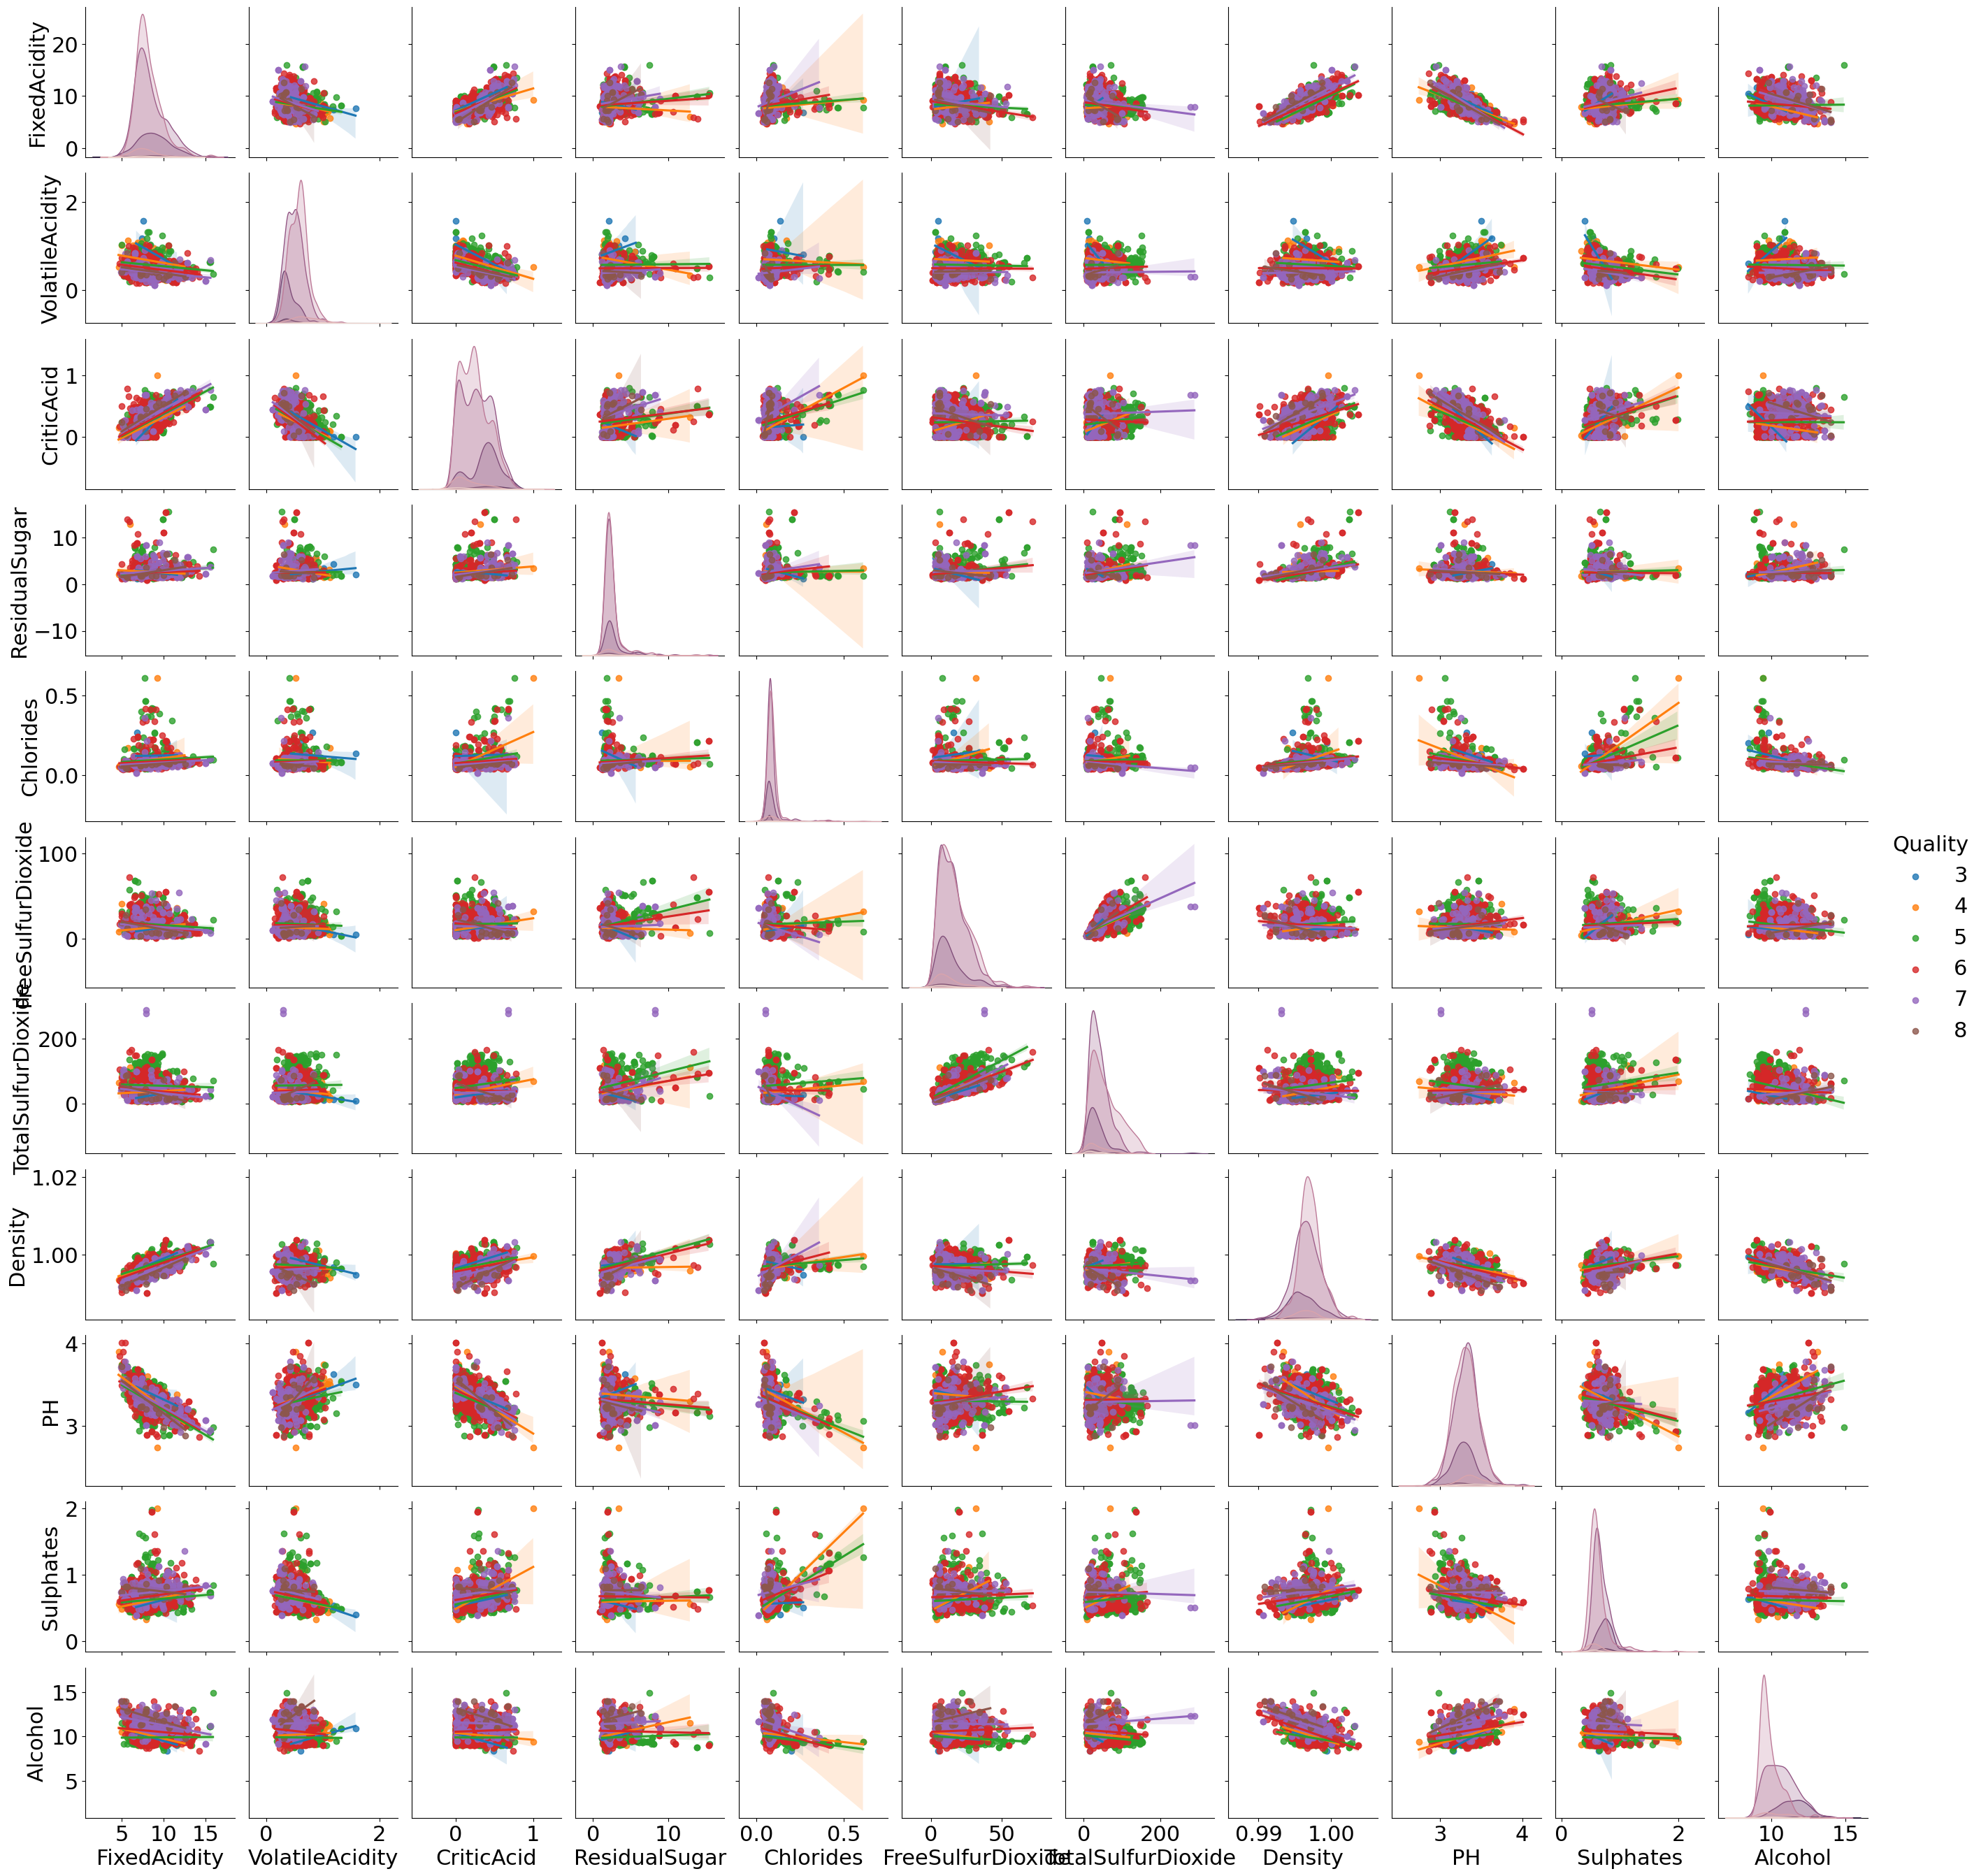

In [293]:
# Import the necessary libraries
import seaborn as sns  # Import the seaborn library for data visualization
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot library for displaying plots

# Define the columns to be plotted in the pairwise plot
cols2plot = data.keys().values

# Create a pairwise scatterplot matrix with regression lines and colored by 'quality'
sns.pairplot(data[cols2plot], kind='reg', hue='Quality')

# Display the plot
plt.show()


### Correlation Matrix 

<Axes: >

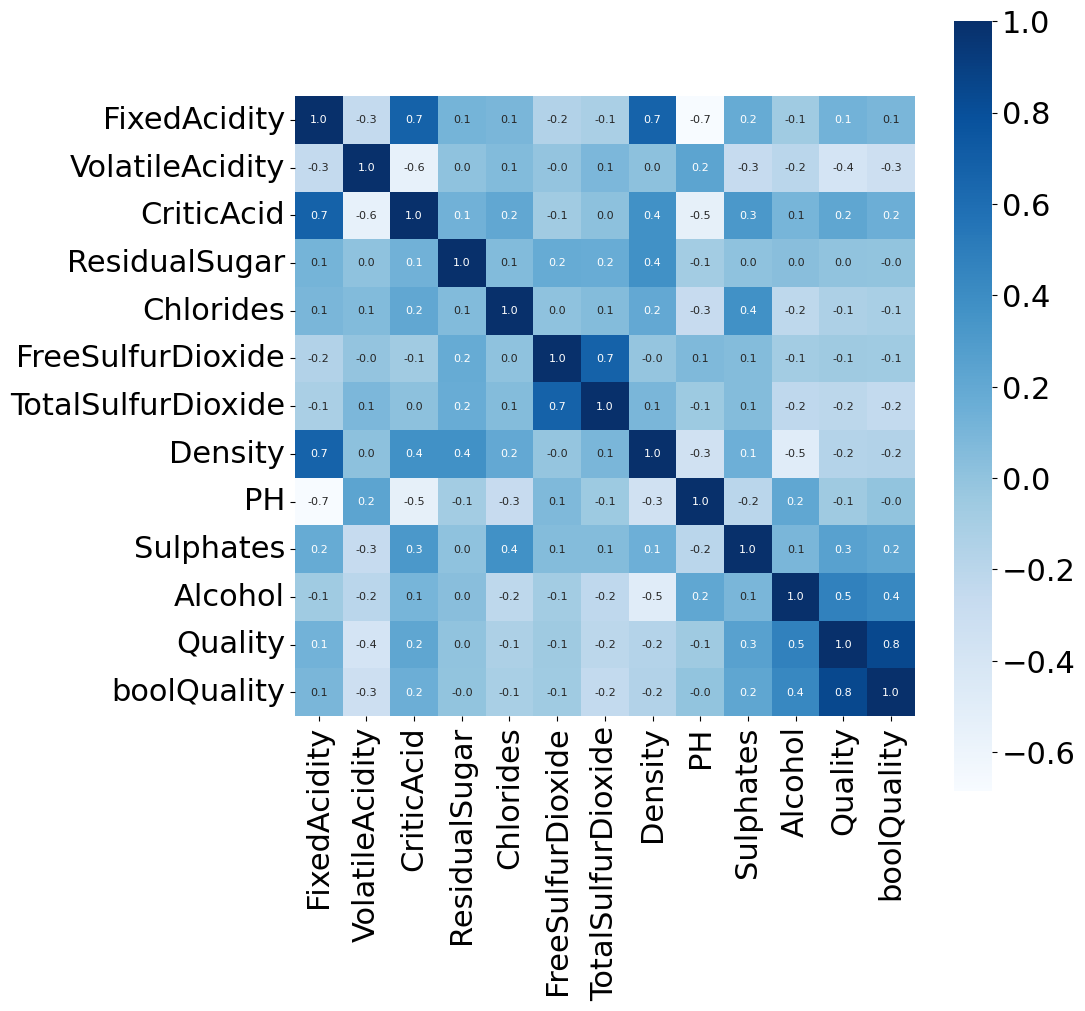

In [329]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8}, cmap="Blues")

### Removed Outliers 

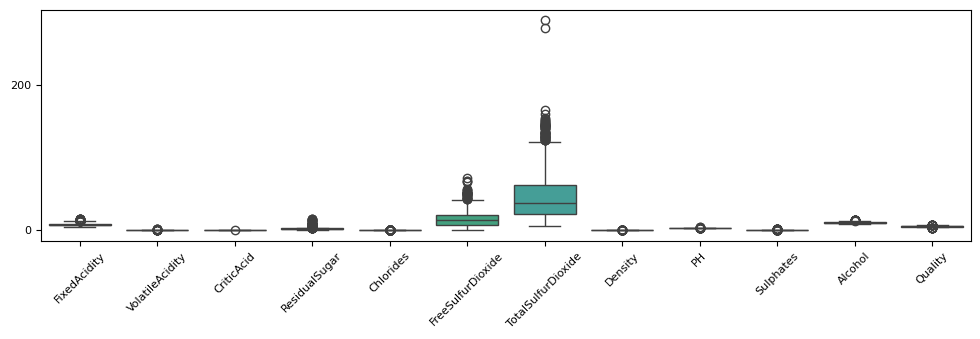

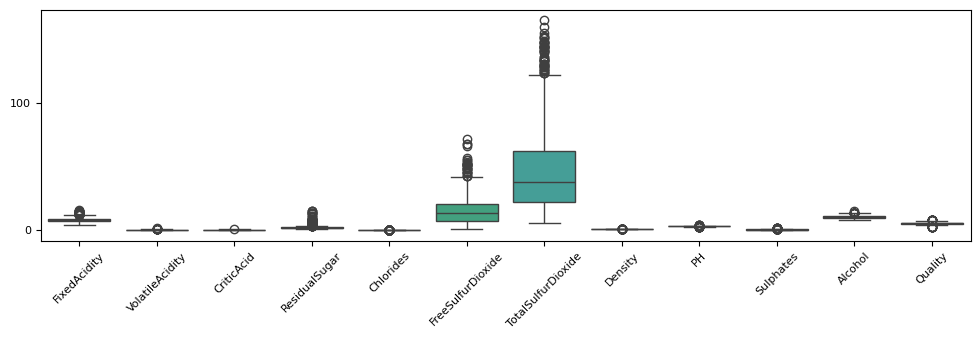

In [294]:
# plot some data
fig,ax = plt.subplots(1,figsize=(12,3))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
ax.set_xlabel(ax.get_xlabel(), fontsize=8)
ax.set_ylabel(ax.get_ylabel(), fontsize=8)
plt.show()

# remove rows with outliers
data = data[data['TotalSulfurDioxide']<200]
fig,ax = plt.subplots(1,figsize=(12,3))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
ax.set_xlabel(ax.get_xlabel(), fontsize=8)
ax.set_ylabel(ax.get_ylabel(), fontsize=8)
plt.show()


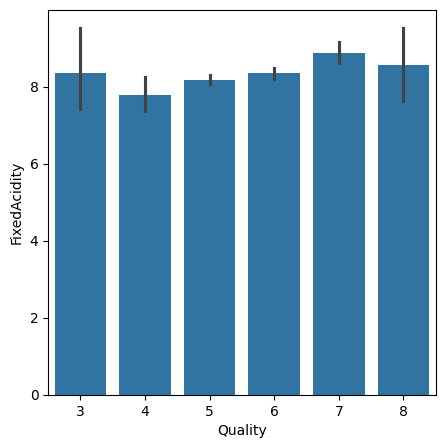

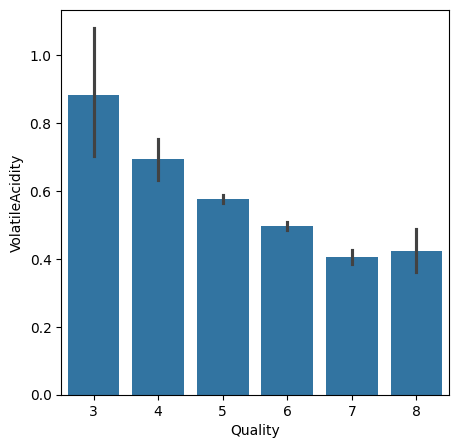

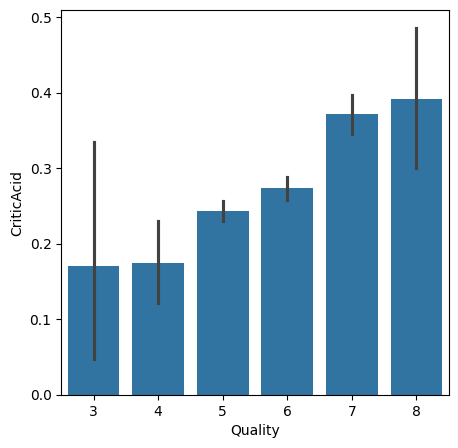

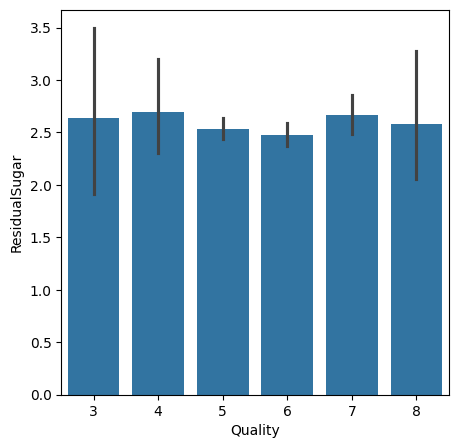

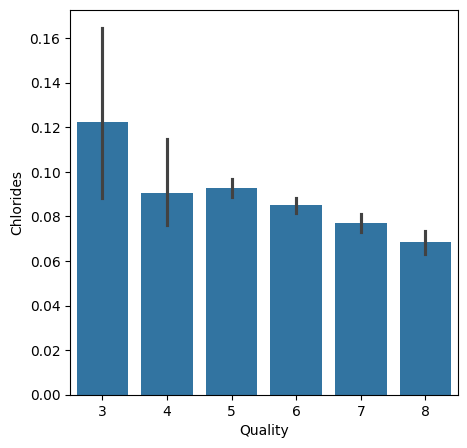

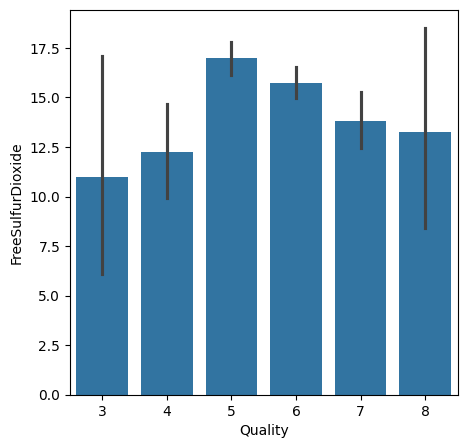

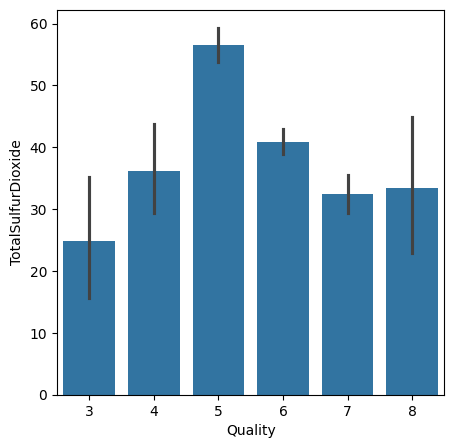

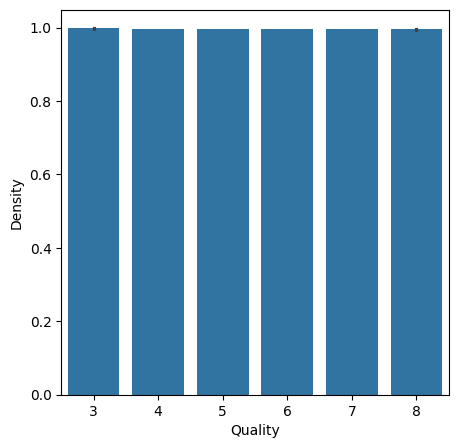

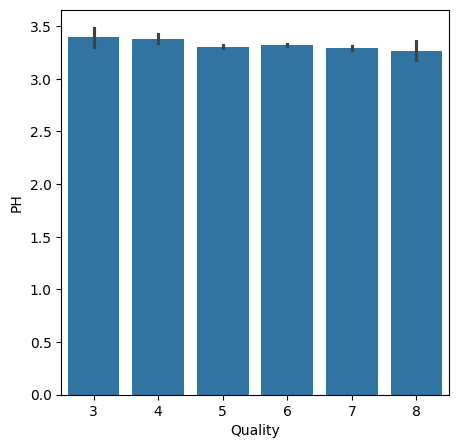

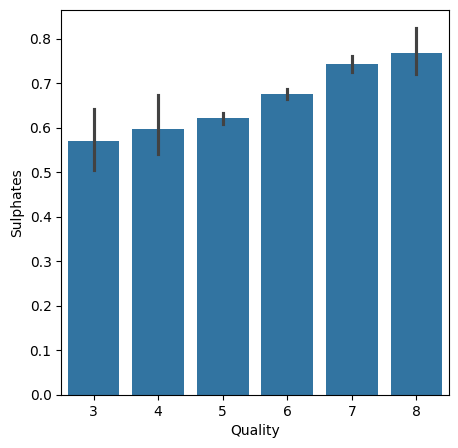

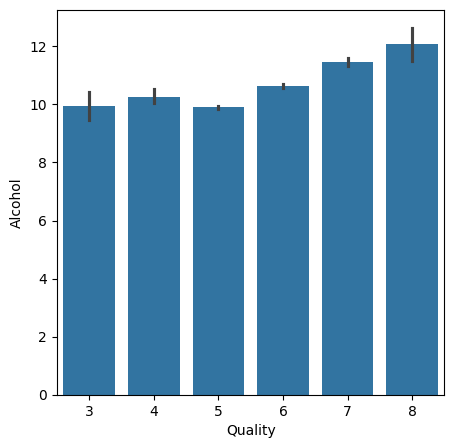

In [ ]:
cols = data.keys()
cols = cols.drop('Quality')

num_arrays = len(cols)

for col in cols: 
    plot = plt.figure(figsize=(5,5))
    sns.barplot(y=data[col], x=data["Quality"], data= data)

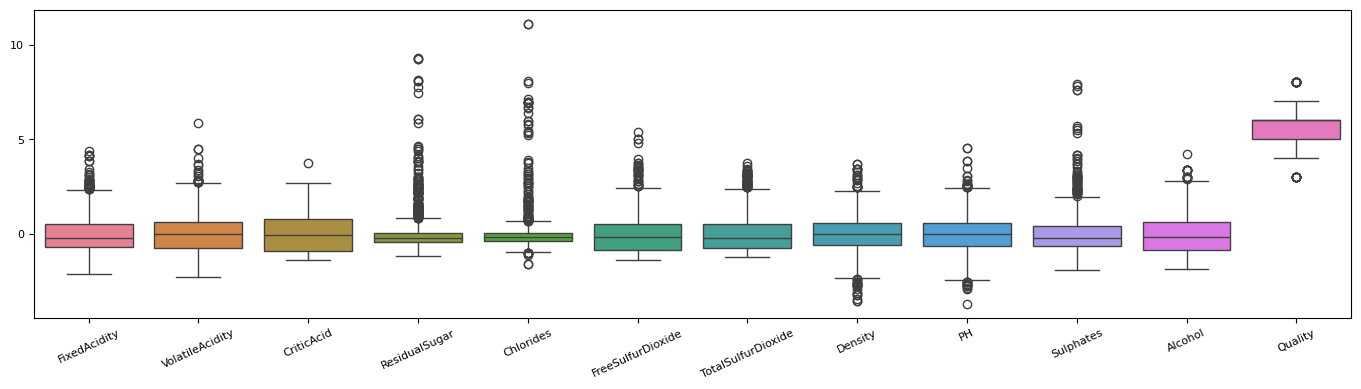

In [295]:
# Find the columns we want to normalize (all except quality)
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('Quality')

# mean centering and scaling data 
for col in cols2zscore:
  meanval   = np.mean(data[col])
  stdev     = np.std(data[col], ddof=1)
  data[col] = (data[col] - meanval) / stdev

fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=25, fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
ax.set_xlabel(ax.get_xlabel(), fontsize=8)
ax.set_ylabel(ax.get_ylabel(), fontsize=8)
plt.show()

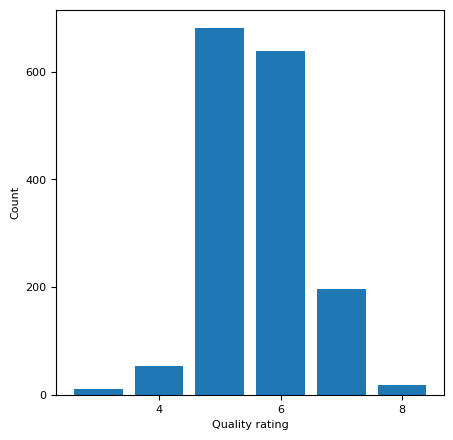

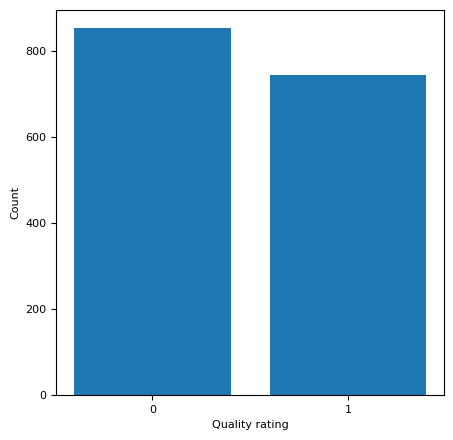

In [296]:
# distribution quality values
fig = plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size': 22})
counts = data['Quality'].value_counts()
plt.bar(list(counts.keys()),counts)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Quality rating', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.show()

data['boolQuality'] = 0
data['boolQuality'][data['Quality']>5] = 1
data[['Quality','boolQuality']]


fig = plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size': 22})
countsBool = data['boolQuality'].value_counts()
plt.bar(["0","1"],countsBool)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Quality rating', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.show()


### PCA 

In [297]:
independent_columns = data.keys().drop("Quality").drop("boolQuality")
dependent_column = ["boolQuality"]

X = np.array(data[independent_columns])
y = np.array(data[dependent_column])
X.shape, y.shape

((1597, 11), (1597, 1))

T (1597, 11)
Score shape and Loading Shape (1597, 1) (1, 11)
r_squared with 1 component 0.2825414303232565
Score shape and Loading Shape (1597, 2) (2, 11)
r_squared with 2 component 0.4599726147345752
Score shape and Loading Shape (1597, 3) (3, 11)
r_squared with 3 component 0.5984809680868222
Score shape and Loading Shape (1597, 4) (4, 11)
r_squared with 4 component 0.7081182769074297
Score shape and Loading Shape (1597, 5) (5, 11)
r_squared with 5 component 0.7967273414995419
Score shape and Loading Shape (1597, 6) (6, 11)
r_squared with 6 component 0.8021148719037796
Score shape and Loading Shape (1597, 7) (7, 11)
r_squared with 7 component 0.8187154063032271
Score shape and Loading Shape (1597, 8) (8, 11)
r_squared with 8 component 0.8777314535664449
Score shape and Loading Shape (1597, 9) (9, 11)
r_squared with 9 component 0.9308278205079934
Score shape and Loading Shape (1597, 10) (10, 11)
r_squared with 10 component 0.9615628388388947
Score shape and Loading Shape (1597, 11) (11

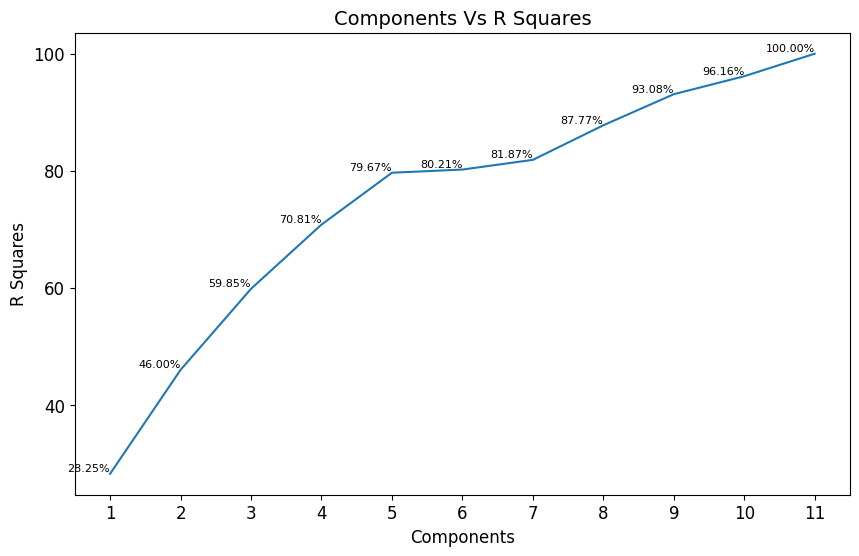

In [298]:
cov_matrix = X.T.dot(X)/(X.shape[0]-1)

# finding eigenvalues and eigenvectors
p, p_vector = np.linalg.eig(cov_matrix)

# Calculating components (scores) 
T = X.dot(p_vector)
print("T", T.shape)
r_squared_obs = []
# calculating prediction r_squared
for i in range(1,12):
    # x_hat using ith component 
    print("Score shape and Loading Shape", T[:, 0:i].shape, p_vector.T[0:i].shape)
    scores = T[:, 0:i]
    loadings = p_vector.T[0:i]
    X_hat = np.dot(scores, loadings)
    error = (X - X_hat).T
    r_squared = 1 - (np.var(error)/np.var(X))
    r_squared_obs.append(r_squared*100)
    print(f"r_squared with {i} component {r_squared}")


# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
x_labels = ["1","2","3","4","5","6","7","8","9","10","11"]
plt.plot(x_labels, r_squared_obs)

point_labels = r_squared_obs

# Adding point labels to the graph
for i, label in enumerate(point_labels):
    plt.text(x_labels[i], r_squared_obs[i], f'{label:.2f}%', ha='right', va='bottom', fontsize=8)

# Adding labels and title
plt.xlabel('Components',  fontsize=12)
plt.ylabel('R Squares',  fontsize=12)
plt.title('Components Vs R Squares',  fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Show the plot
plt.show()


In [299]:
data_new_x = torch.tensor(T[:,:]).float()
data_new_y = torch.tensor(y).float()
print("New Data Shapes :", data_new_x.shape, data_new_y.shape)

data_old_x = torch.tensor(X).float()
data_old_y = torch.tensor(y).float()
print("Old Data Shapes :",data_old_x.shape, data_old_y.shape)

New Data Shapes : torch.Size([1597, 11]) torch.Size([1597, 1])
Old Data Shapes : torch.Size([1597, 11]) torch.Size([1597, 1])


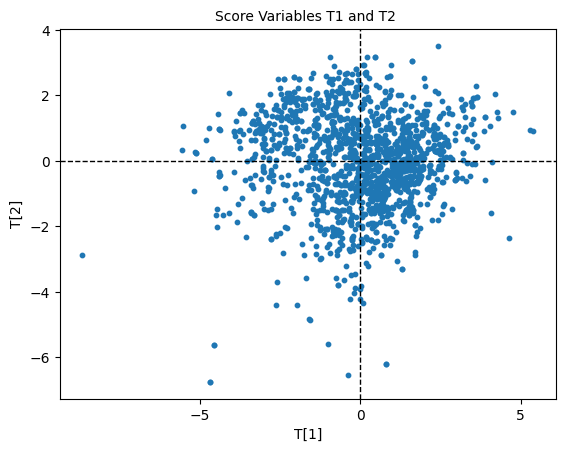

In [300]:
# Sample data
x_axis = T[:, 0]
y_axis = T[:, 1]

# Creating the scatter plot
plt.scatter(x_axis, y_axis,  s=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding labels and title
plt.xlabel('T[1]', fontsize=10)
plt.ylabel('T[2]', fontsize=10)
plt.title('Score Variables T1 and T2 ', fontsize=10)

# Adding a dotted line at (0, 0)
plt.axhline(0, linestyle='--', color='black', linewidth=1)  # Horizontal line at y=0
plt.axvline(0, linestyle='--', color='black', linewidth=1)  # Vertical line at x=0

# Displaying the plot
plt.show()

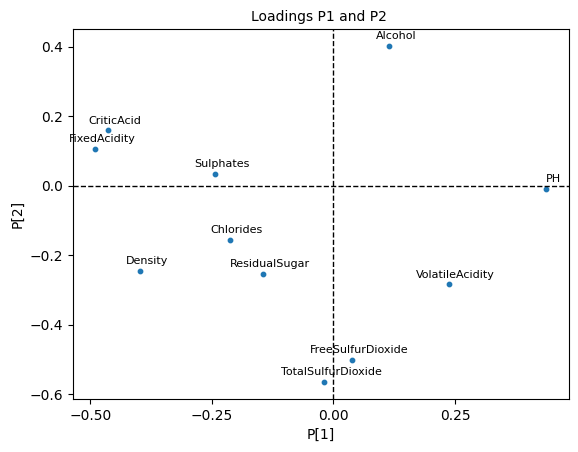

In [301]:
# Sample data
x_axis = p_vector.T[0, :].T
y_axis = p_vector.T[1, :].T
point_labels = cols2zscore

# Creating the scatter plot
plt.scatter(x_axis, y_axis,  s=10)

# Annotate each point with its label
for i, label in enumerate(point_labels):
    plt.annotate(label, (x_axis[i], y_axis[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding labels and title
plt.xlabel('P[1]', fontsize=10)
plt.ylabel('P[2]', fontsize=10)
plt.title('Loadings P1 and P2 ', fontsize=10)

# Adding a dotted line at (0, 0)
plt.axhline(0, linestyle='--', color='black', linewidth=1)  # Horizontal line at y=0
plt.axvline(0, linestyle='--', color='black', linewidth=1)  # Vertical line at x=0

# Displaying the plot
plt.show()

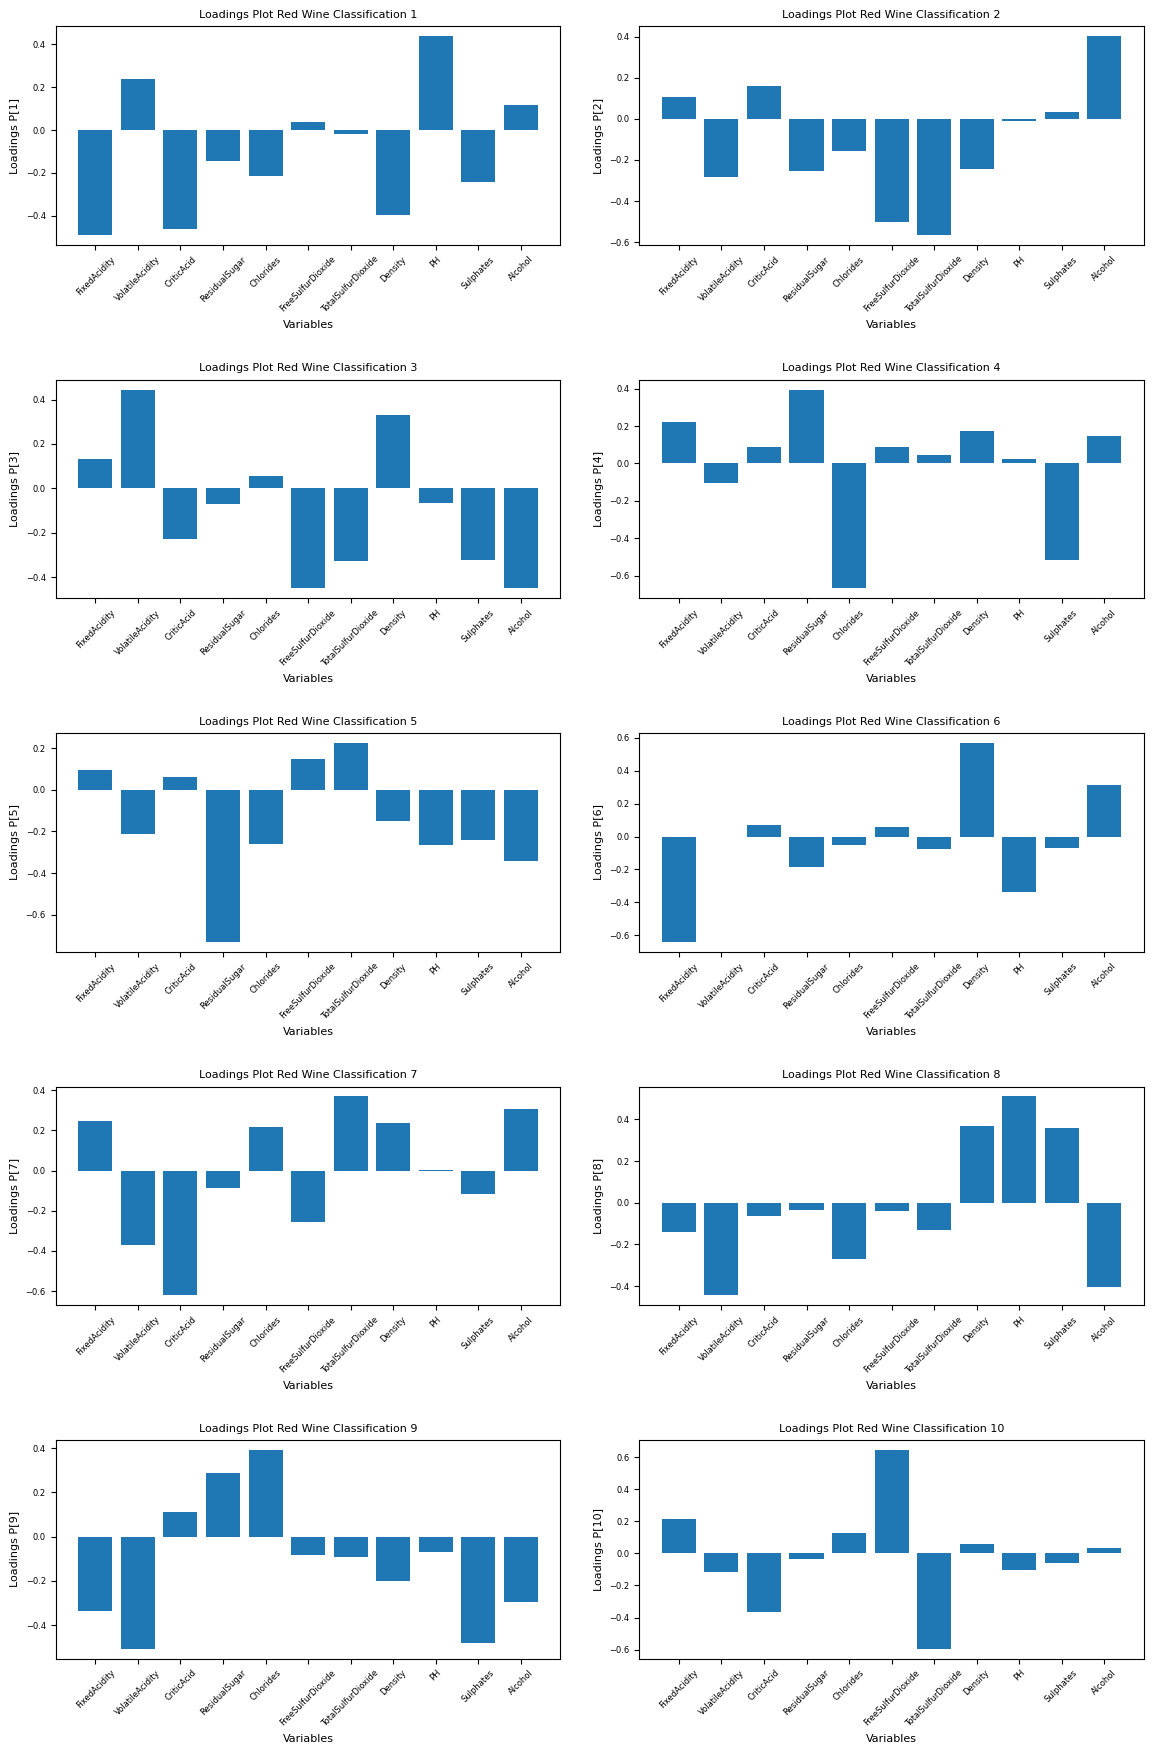

In [302]:
# Create 10 subplots arranged in a 5x2 grid
fig, axs = plt.subplots(5, 2, figsize=(12, 18))

axs = axs.flatten()

for i, ax in enumerate(axs):
    ax.bar(cols2zscore, p_vector.T[i, :])
    ax.set_xlabel('Variables', fontsize=8)
    ax.set_ylabel(f'Loadings P[{i+1}]', fontsize=8)
    ax.set_title(f'Loadings Plot Red Wine Classification {i+1}', fontsize=8)
    ax.tick_params(axis='x', labelrotation=45, labelsize=6)
    ax.tick_params(axis='y', labelsize=6)

plt.tight_layout()
plt.show()


In [303]:
# Use scikit-learn to split the data into training and testing sets
train_data_old, test_data_old, train_labels_old, test_labels_old = train_test_split(data_old_x, data_old_y, test_size=.25)
train_data_new, test_data_new, train_labels_new, test_labels_new = train_test_split(data_new_x, data_new_y, test_size=.25)

print("Old Data Splits", train_data_old.shape, test_data_old.shape, train_labels_old.shape, test_labels_old.shape)
print("New Data Splits", train_data_new.shape, test_data_new.shape, train_labels_new.shape, test_labels_new.shape)


Old Data Splits torch.Size([1197, 11]) torch.Size([400, 11]) torch.Size([1197, 1]) torch.Size([400, 1])
New Data Splits torch.Size([1197, 11]) torch.Size([400, 11]) torch.Size([1197, 1]) torch.Size([400, 1])


### SVM ( Support Vector Machine)

### Classification using SVM Without PCA

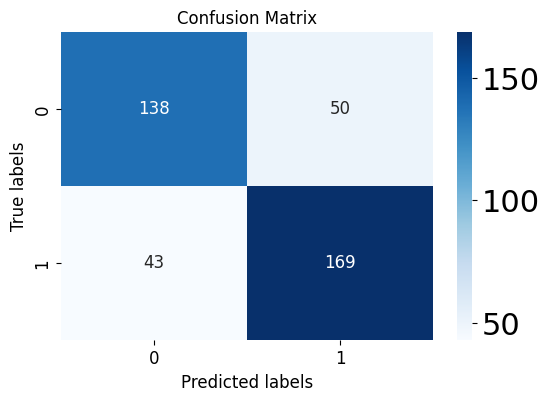

Accuracy: 0.7675
Precision: 0.7972
Recall: 0.7717
F1-Score: 0.7842


In [304]:
svc_clf = SVC(C=1.0, 
              kernel='rbf', 
              degree=3, 
              gamma='auto', 
              coef0=0.0, shrinking=True, 
              probability=False, 
              tol=0.001, cache_size=200, 
              class_weight=None, 
              verbose=False, max_iter=-1, 
              decision_function_shape='ovr', 
              break_ties=False,random_state=None)

svc_clf.fit(train_data_old, train_labels_old)

y_pred1 = svc_clf.predict(test_data_old)

cm = confusion_matrix(y_pred1, test_labels_old)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
  
accuracy =  accuracy_score(test_labels_old, y_pred1)
precision = precision_score(test_labels_old, y_pred1)
recall = recall_score(test_labels_old, y_pred1)
f1 = f1_score(test_labels_old, y_pred1)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


### Cross Validation Accuracy 

In [311]:

scores = cross_val_score(svc_clf, train_data_old, train_labels_old, cv=7)

mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)


Mean Cross-Validation Score: 0.7543859649122806


### Classification Using SVM With PCA


torch.Size([1197, 1]) torch.Size([400, 1])


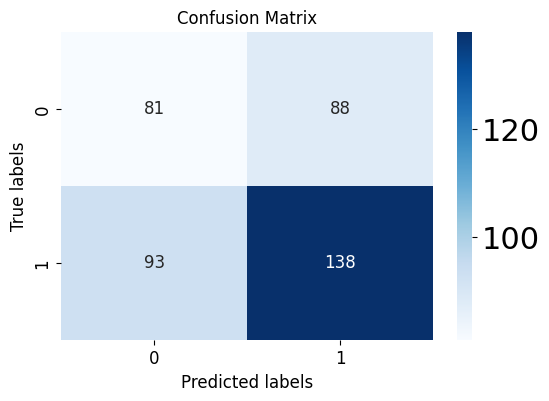

Principal components =================================>   1
Accuracy: 0.7600
Precision: 0.5974
Recall: 0.6106
F1-Score: 0.6039
Mean Cross-Validation Score: 0.5321637426900584
train Acc :  0.5547201336675021 Test Acc  0.5475 comptime  0.015625
*****************************************************************************************
torch.Size([1197, 2]) torch.Size([400, 2])


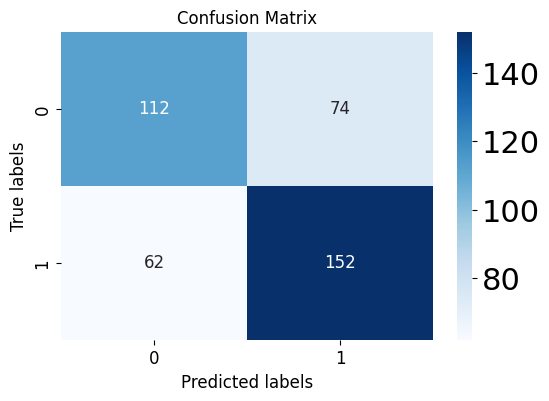

Principal components =================================>   2
Accuracy: 0.7600
Precision: 0.7103
Recall: 0.6726
F1-Score: 0.6909
Mean Cross-Validation Score: 0.6382623224728488
train Acc :  0.658312447786132 Test Acc  0.66 comptime  0.03125
*****************************************************************************************
torch.Size([1197, 3]) torch.Size([400, 3])


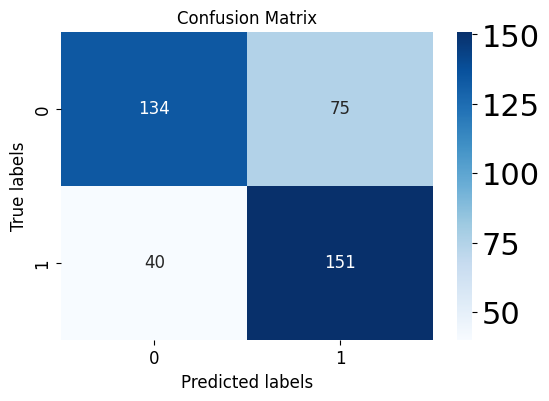

Principal components =================================>   3
Accuracy: 0.7600
Precision: 0.7906
Recall: 0.6681
F1-Score: 0.7242
Mean Cross-Validation Score: 0.7184628237259816
train Acc :  0.7426900584795322 Test Acc  0.7125 comptime  0.015625
*****************************************************************************************
torch.Size([1197, 4]) torch.Size([400, 4])


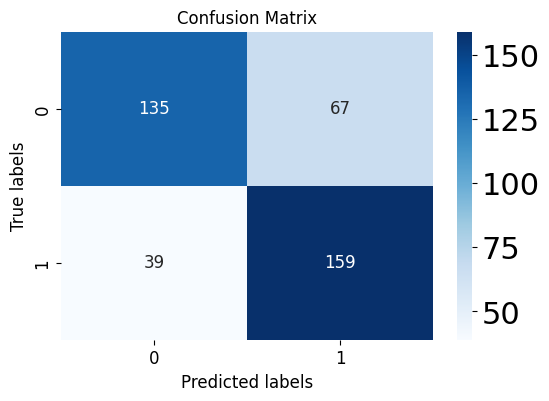

Principal components =================================>   4
Accuracy: 0.7600
Precision: 0.8030
Recall: 0.7035
F1-Score: 0.7500
Mean Cross-Validation Score: 0.7167919799498746
train Acc :  0.758563074352548 Test Acc  0.735 comptime  0.078125
*****************************************************************************************
torch.Size([1197, 5]) torch.Size([400, 5])


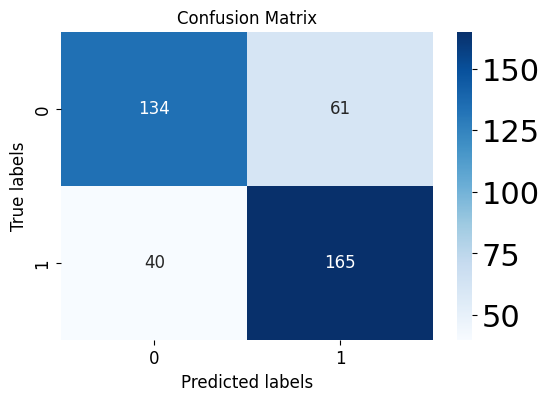

Principal components =================================>   5
Accuracy: 0.7600
Precision: 0.8049
Recall: 0.7301
F1-Score: 0.7657
Mean Cross-Validation Score: 0.7326649958228906
train Acc :  0.7685881370091896 Test Acc  0.7475 comptime  0.171875
*****************************************************************************************
torch.Size([1197, 6]) torch.Size([400, 6])


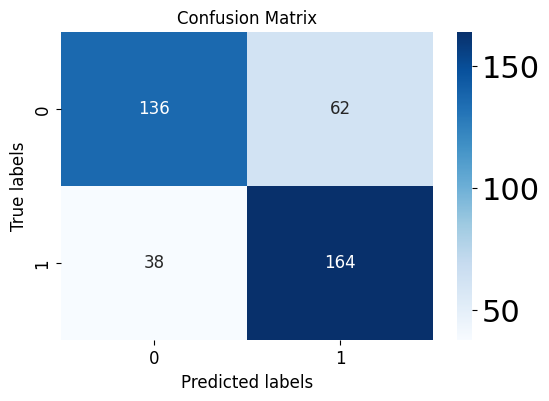

Principal components =================================>   6
Accuracy: 0.7600
Precision: 0.8119
Recall: 0.7257
F1-Score: 0.7664
Mean Cross-Validation Score: 0.7376775271512113
train Acc :  0.7702589807852965 Test Acc  0.75 comptime  0.1875
*****************************************************************************************
torch.Size([1197, 7]) torch.Size([400, 7])


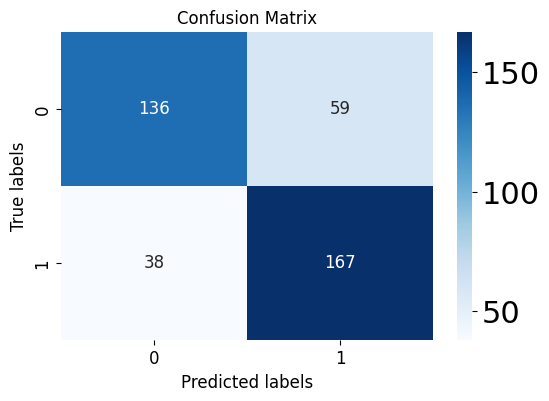

Principal components =================================>   7
Accuracy: 0.7600
Precision: 0.8146
Recall: 0.7389
F1-Score: 0.7749
Mean Cross-Validation Score: 0.7418546365914788
train Acc :  0.7669172932330827 Test Acc  0.7575 comptime  0.109375
*****************************************************************************************
torch.Size([1197, 8]) torch.Size([400, 8])


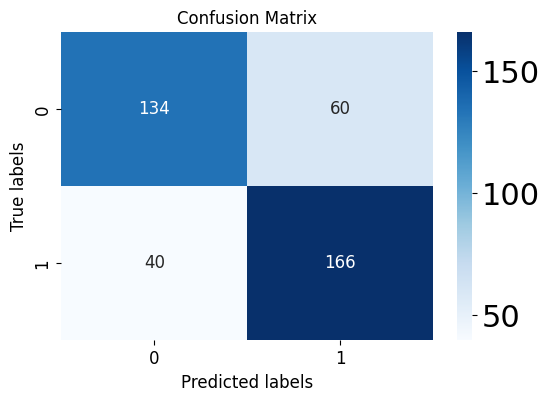

Principal components =================================>   8
Accuracy: 0.7600
Precision: 0.8058
Recall: 0.7345
F1-Score: 0.7685
Mean Cross-Validation Score: 0.7418546365914788
train Acc :  0.7819548872180451 Test Acc  0.75 comptime  0.125
*****************************************************************************************
torch.Size([1197, 9]) torch.Size([400, 9])


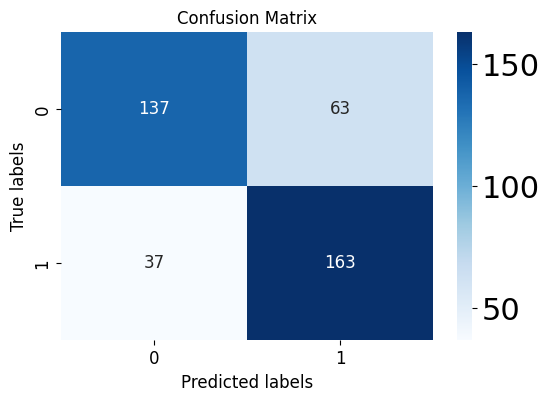

Principal components =================================>   9
Accuracy: 0.7600
Precision: 0.8150
Recall: 0.7212
F1-Score: 0.7653
Mean Cross-Validation Score: 0.7385129490392648
train Acc :  0.7852965747702589 Test Acc  0.75 comptime  0.078125
*****************************************************************************************
torch.Size([1197, 10]) torch.Size([400, 10])


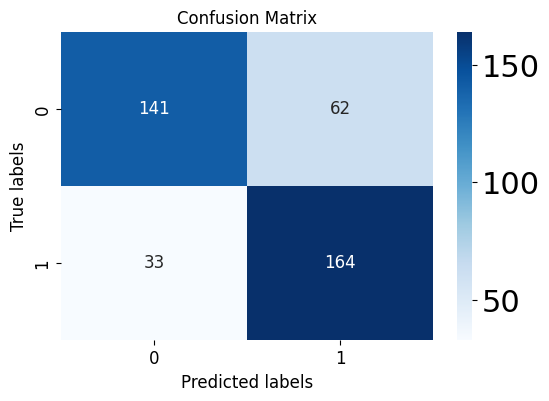

Principal components =================================>   10
Accuracy: 0.7600
Precision: 0.8325
Recall: 0.7257
F1-Score: 0.7754
Mean Cross-Validation Score: 0.746031746031746
train Acc :  0.797827903091061 Test Acc  0.7625 comptime  0.09375
*****************************************************************************************
torch.Size([1197, 11]) torch.Size([400, 11])


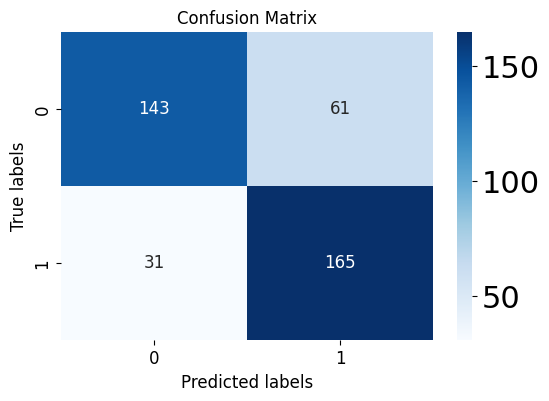

Principal components =================================>   11
Accuracy: 0.7600
Precision: 0.8418
Recall: 0.7301
F1-Score: 0.7820
Mean Cross-Validation Score: 0.7477025898078529
train Acc :  0.7969924812030075 Test Acc  0.77 comptime  0.203125
*****************************************************************************************


In [313]:
accuracyResultsTrain = np.zeros(12)
accuracyResultsTest = np.zeros(12)
accuracyResultsCrossValidation = np.zeros(12)
resultLosses = np.zeros(12)
comptime = np.zeros(12)

for component in range(1,12):
    train_data_new_temp = train_data_new[:, 0:component]
    test_data_new_temp = test_data_new[:, 0:component]
    print(train_data_new_temp.shape, test_data_new_temp.shape)
    
    starttime = time.process_time()
    svc_clf = SVC(C=1.0, 
              kernel='rbf', 
              degree=3, 
              gamma='auto', 
              coef0=0.0, shrinking=True, 
              probability=False, 
              tol=0.001, cache_size=200, 
              class_weight=None, 
              verbose=False, max_iter=-1, 
              decision_function_shape='ovr', 
              break_ties=False,random_state=None)
    svc_clf.fit(train_data_new_temp, train_labels_new)
    compltime = time.process_time()
    
    y_train_prediction = svc_clf.predict(train_data_new_temp)
    y_test_prediction = svc_clf.predict(test_data_new_temp)
    
    cm = confusion_matrix(y_test_prediction, test_labels_new)

    # Display the confusion matrix using a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
    plt.xlabel('Predicted labels', fontsize=12)
    plt.ylabel('True labels', fontsize=12)
    plt.title('Confusion Matrix', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
    
    scores = cross_val_score(svc_clf, train_data_new_temp, train_labels_new, cv=7)
    mean_score = scores.mean()
    
    train_accuracy =  accuracy_score(train_labels_new, y_train_prediction)
    test_accuracy =  accuracy_score(test_labels_new, y_test_prediction)
    precision = precision_score(test_labels_new, y_test_prediction)
    recall = recall_score(test_labels_new, y_test_prediction)
    f1 = f1_score(test_labels_new, y_test_prediction)

    # Print the metrics
    print("Principal components =================================>  ", component)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Mean Cross-Validation Score:", mean_score)
    
    accuracyResultsTrain[component] = train_accuracy
    accuracyResultsTest[component] = test_accuracy
    accuracyResultsCrossValidation[component] = mean_score
    comptime[component] = (compltime - starttime)
    print("train Acc : ", train_accuracy, "Test Acc ", test_accuracy, "comptime ", comptime[component])
    
    print("*****************************************************************************************")




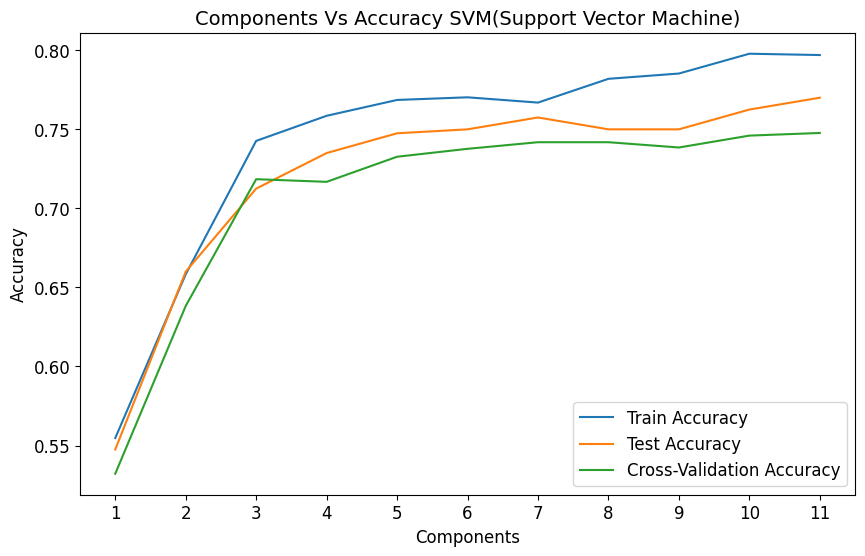

In [314]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
x_labels = ["1","2","3","4","5","6","7","8","9","10","11"]
accuracyResultsTrain_new = accuracyResultsTrain[1:12]
accuracyResultsTest_new = accuracyResultsTest[1:12]
accuracyResultsCrossValidation_new = accuracyResultsCrossValidation[1:12]


plt.plot(x_labels, accuracyResultsTrain_new, label='Train Accuracy')
plt.plot(x_labels, accuracyResultsTest_new, label='Test Accuracy')
plt.plot(x_labels, accuracyResultsCrossValidation_new, label='Cross-Validation Accuracy')

plt.xlabel('Components',  fontsize=12)
plt.ylabel('Accuracy',  fontsize=12)
plt.title('Components Vs Accuracy SVM(Support Vector Machine)',  fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

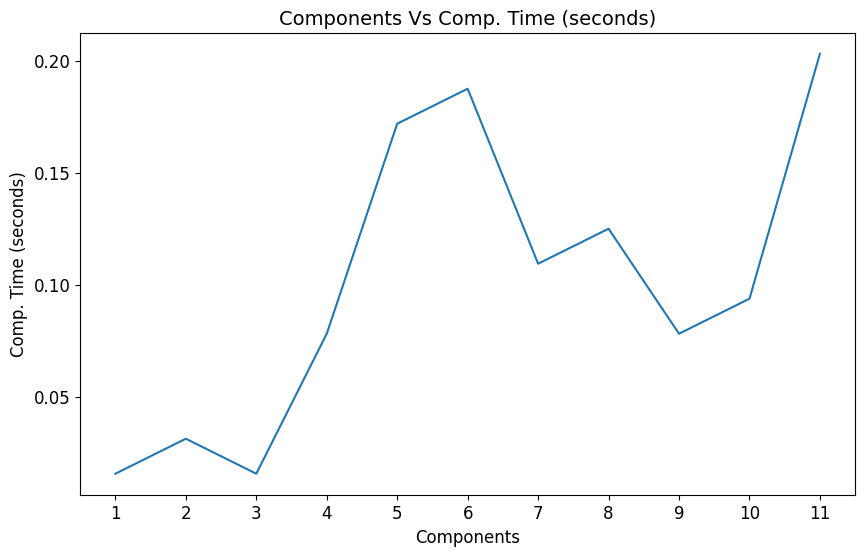

In [315]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
x_labels = ["1","2","3","4","5","6","7","8","9","10","11"]
comptime_new = comptime[1:12]
plt.plot(x_labels, comptime_new)

plt.xlabel('Components',  fontsize=12)
plt.ylabel('Comp. Time (seconds)',  fontsize=12)
plt.title('Components Vs Comp. Time (seconds)',  fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### LDA Linear Discriminant Analysis 

### Without PCA with LDA 

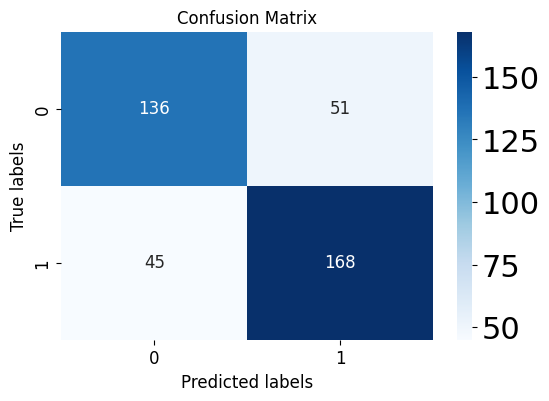

Accuracy: 0.7600
Precision: 0.7887
Recall: 0.7671
F1-Score: 0.7778


In [316]:

lda = LinearDiscriminantAnalysis()
lda.fit(train_data_old,train_labels_old)

y_pred1 = lda.predict(test_data_old)

cm = confusion_matrix(y_pred1, test_labels_old)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
  
accuracy =  accuracy_score(test_labels_old, y_pred1)
precision = precision_score(test_labels_old, y_pred1)
recall = recall_score(test_labels_old, y_pred1)
f1 = f1_score(test_labels_old, y_pred1)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


### Cross Validation LDA 

In [317]:

scores = cross_val_score(lda, train_data_old, train_labels_old, cv=7)

mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)


Mean Cross-Validation Score: 0.7351712614870508


### After Applying PCA in LDA 

torch.Size([1197, 1]) torch.Size([400, 1])


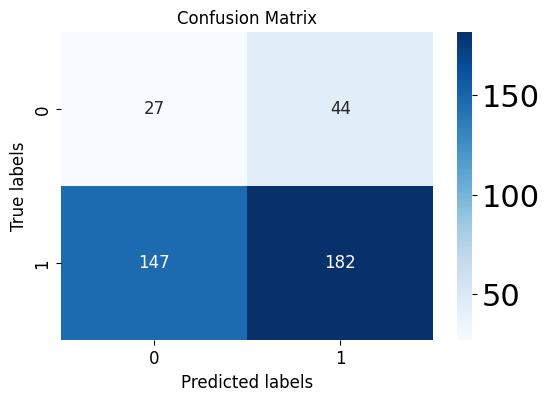

Principal components =================================>   1
Accuracy: 0.7600
Precision: 0.5532
Recall: 0.8053
F1-Score: 0.6559
Mean Cross-Validation Score: 0.518796992481203
train Acc :  0.5179615705931495 Test Acc  0.5225 comptime  0.0
*****************************************************************************************
torch.Size([1197, 2]) torch.Size([400, 2])


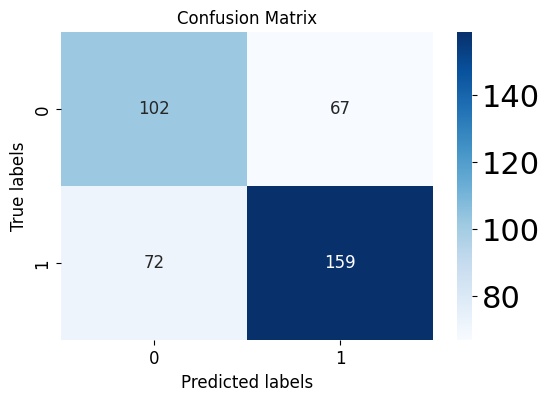

Principal components =================================>   2
Accuracy: 0.7600
Precision: 0.6883
Recall: 0.7035
F1-Score: 0.6958
Mean Cross-Validation Score: 0.6482873851294905
train Acc :  0.647451963241437 Test Acc  0.6525 comptime  0.0
*****************************************************************************************
torch.Size([1197, 3]) torch.Size([400, 3])


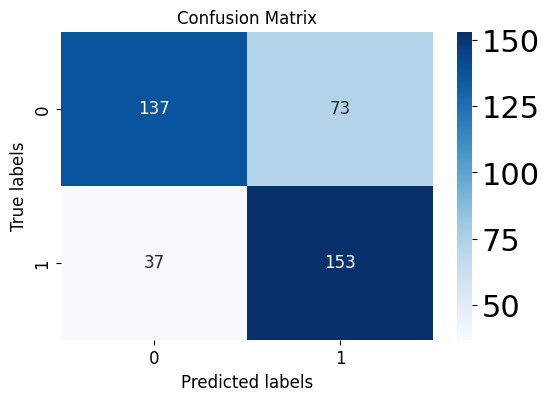

Principal components =================================>   3
Accuracy: 0.7600
Precision: 0.8053
Recall: 0.6770
F1-Score: 0.7356
Mean Cross-Validation Score: 0.7218045112781956
train Acc :  0.722639933166249 Test Acc  0.725 comptime  0.0
*****************************************************************************************
torch.Size([1197, 4]) torch.Size([400, 4])


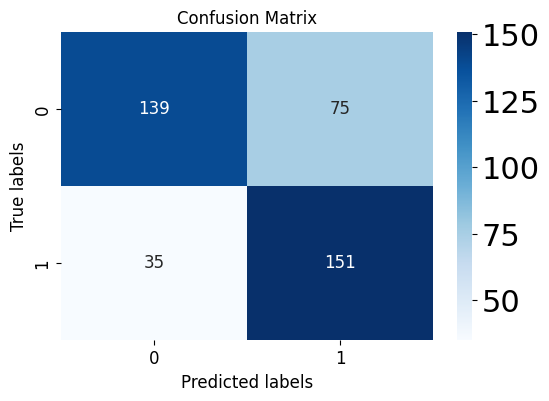

Principal components =================================>   4
Accuracy: 0.7600
Precision: 0.8118
Recall: 0.6681
F1-Score: 0.7330
Mean Cross-Validation Score: 0.7218045112781954
train Acc :  0.7218045112781954 Test Acc  0.725 comptime  0.0
*****************************************************************************************
torch.Size([1197, 5]) torch.Size([400, 5])


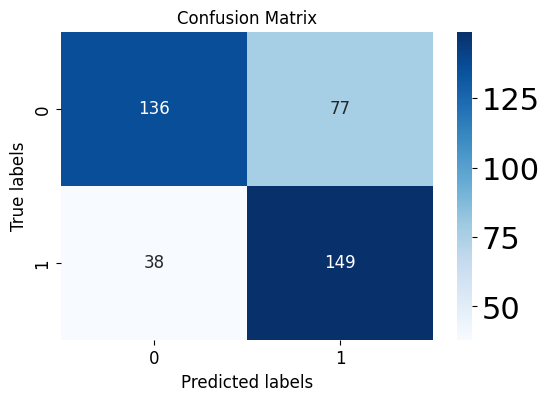

Principal components =================================>   5
Accuracy: 0.7600
Precision: 0.7968
Recall: 0.6593
F1-Score: 0.7215
Mean Cross-Validation Score: 0.7243107769423559
train Acc :  0.7251461988304093 Test Acc  0.7125 comptime  0.0
*****************************************************************************************
torch.Size([1197, 6]) torch.Size([400, 6])


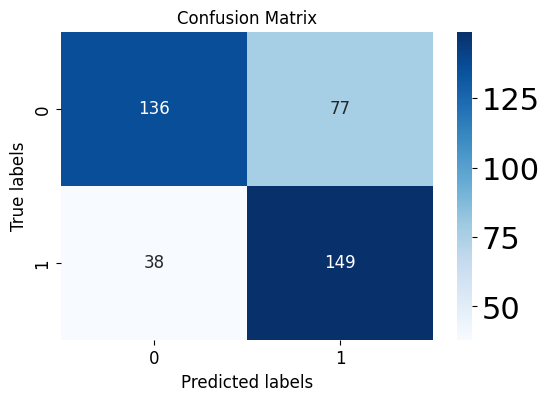

Principal components =================================>   6
Accuracy: 0.7600
Precision: 0.7968
Recall: 0.6593
F1-Score: 0.7215
Mean Cross-Validation Score: 0.720969089390142
train Acc :  0.7259816207184628 Test Acc  0.7125 comptime  0.0
*****************************************************************************************
torch.Size([1197, 7]) torch.Size([400, 7])


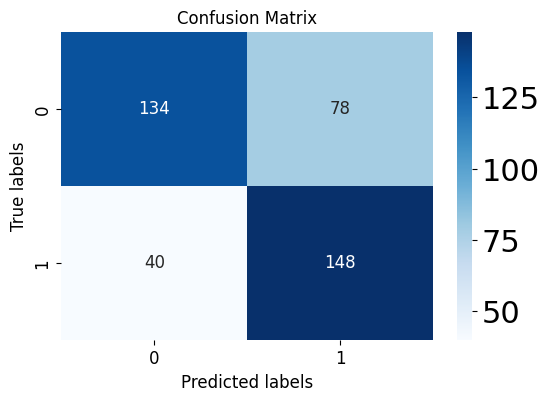

Principal components =================================>   7
Accuracy: 0.7600
Precision: 0.7872
Recall: 0.6549
F1-Score: 0.7150
Mean Cross-Validation Score: 0.7293233082706766
train Acc :  0.7284878863826232 Test Acc  0.705 comptime  0.0
*****************************************************************************************
torch.Size([1197, 8]) torch.Size([400, 8])


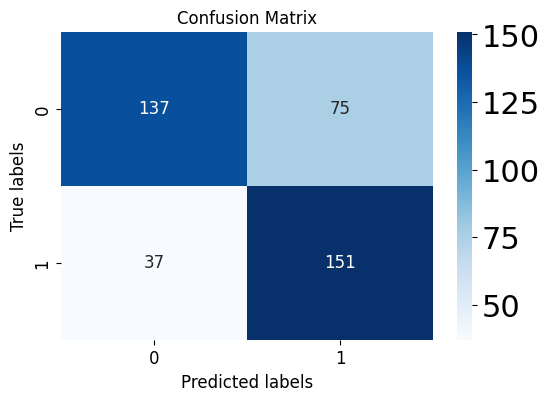

Principal components =================================>   8
Accuracy: 0.7600
Precision: 0.8032
Recall: 0.6681
F1-Score: 0.7295
Mean Cross-Validation Score: 0.722639933166249
train Acc :  0.720969089390142 Test Acc  0.72 comptime  0.03125
*****************************************************************************************
torch.Size([1197, 9]) torch.Size([400, 9])


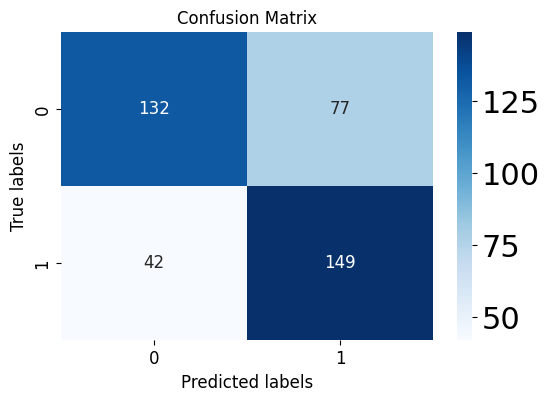

Principal components =================================>   9
Accuracy: 0.7600
Precision: 0.7801
Recall: 0.6593
F1-Score: 0.7146
Mean Cross-Validation Score: 0.7401837928153717
train Acc :  0.7376775271512114 Test Acc  0.7025 comptime  0.0
*****************************************************************************************
torch.Size([1197, 10]) torch.Size([400, 10])


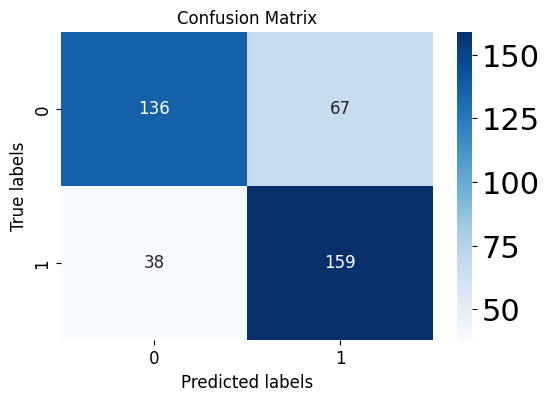

Principal components =================================>   10
Accuracy: 0.7600
Precision: 0.8071
Recall: 0.7035
F1-Score: 0.7518
Mean Cross-Validation Score: 0.7435254803675857
train Acc :  0.7493734335839599 Test Acc  0.7375 comptime  0.015625
*****************************************************************************************
torch.Size([1197, 11]) torch.Size([400, 11])


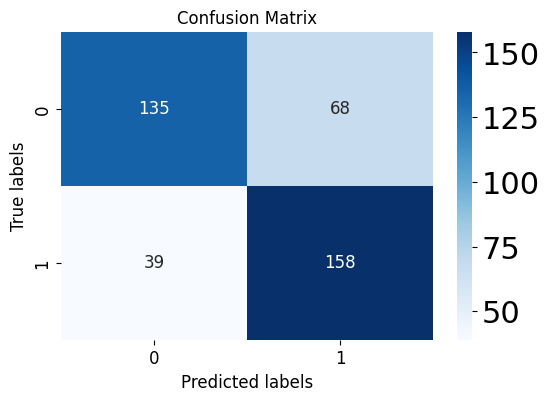

Principal components =================================>   11
Accuracy: 0.7600
Precision: 0.8020
Recall: 0.6991
F1-Score: 0.7470
Mean Cross-Validation Score: 0.7485380116959064
train Acc :  0.7560568086883876 Test Acc  0.7325 comptime  0.0
*****************************************************************************************


In [323]:
accuracyResultsTrainLDA = np.zeros(12)
accuracyResultsTestLDA = np.zeros(12)
accuracyResultsCrossValidationLDA = np.zeros(12)
resultLosses = np.zeros(12)
comptime = np.zeros(12)

for component in range(1,12):
    train_data_new_temp = train_data_new[:, 0:component]
    test_data_new_temp = test_data_new[:, 0:component]
    print(train_data_new_temp.shape, test_data_new_temp.shape)
    
    starttime = time.process_time()
    lda = LinearDiscriminantAnalysis()
    lda.fit(train_data_new_temp, train_labels_new)
    compltime = time.process_time()
    
    y_train_prediction = lda.predict(train_data_new_temp)
    y_test_prediction = lda.predict(test_data_new_temp)
    
    cm = confusion_matrix(y_test_prediction, test_labels_new)

    # Display the confusion matrix using a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
    plt.xlabel('Predicted labels', fontsize=12)
    plt.ylabel('True labels', fontsize=12)
    plt.title('Confusion Matrix', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
    scores = cross_val_score(lda, train_data_new_temp, train_labels_new, cv=7)
    mean_score = scores.mean()
    
    train_accuracy =  accuracy_score(train_labels_new, y_train_prediction)
    test_accuracy =  accuracy_score(test_labels_new, y_test_prediction)
    precision = precision_score(test_labels_new, y_test_prediction)
    recall = recall_score(test_labels_new, y_test_prediction)
    f1 = f1_score(test_labels_new, y_test_prediction)

    # Print the metrics
    print("Principal components =================================>  ", component)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Mean Cross-Validation Score:", mean_score)

    
    accuracyResultsTrainLDA[component] = train_accuracy
    accuracyResultsTestLDA[component] = test_accuracy
    accuracyResultsCrossValidationLDA[component] = mean_score
    comptime[component] = (compltime - starttime)
    print("train Acc : ", train_accuracy, "Test Acc ", test_accuracy, "comptime ", comptime[component])
    
    print("*****************************************************************************************")




[0.55472013 0.65831245 0.74269006 0.75856307 0.76858814 0.77025898
 0.76691729 0.78195489 0.78529657 0.7978279  0.79699248]


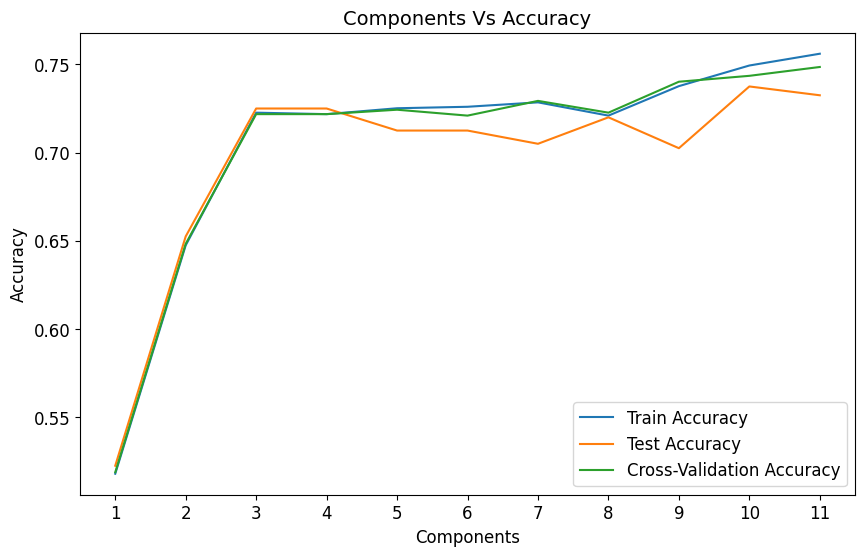

In [324]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
x_labels = ["1","2","3","4","5","6","7","8","9","10","11"]
accuracyResultsTrain_newLDA = accuracyResultsTrainLDA[1:12]
accuracyResultsTest_newLDA = accuracyResultsTestLDA[1:12]
accuracyResultsCrossValidation_newLDA = accuracyResultsCrossValidationLDA[1:12]
print(accuracyResultsTrain_new)

plt.plot(x_labels, accuracyResultsTrain_newLDA, label='Train Accuracy')
plt.plot(x_labels, accuracyResultsTest_newLDA, label='Test Accuracy')
plt.plot(x_labels, accuracyResultsCrossValidation_newLDA, label='Cross-Validation Accuracy')

plt.xlabel('Components',  fontsize=12)
plt.ylabel('Accuracy',  fontsize=12)
plt.title('Components Vs Accuracy',  fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

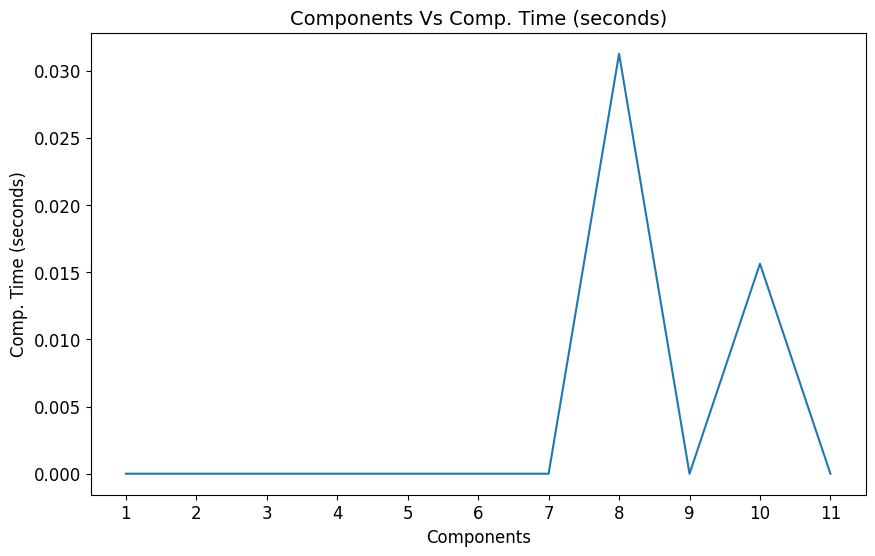

In [325]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
x_labels = ["1","2","3","4","5","6","7","8","9","10","11"]
comptime_new = comptime[1:12]
plt.plot(x_labels, comptime_new)

plt.xlabel('Components',  fontsize=12)
plt.ylabel('Comp. Time (seconds)',  fontsize=12)
plt.title('Components Vs Comp. Time (seconds)',  fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### KNN (K Nearest Neighbour)

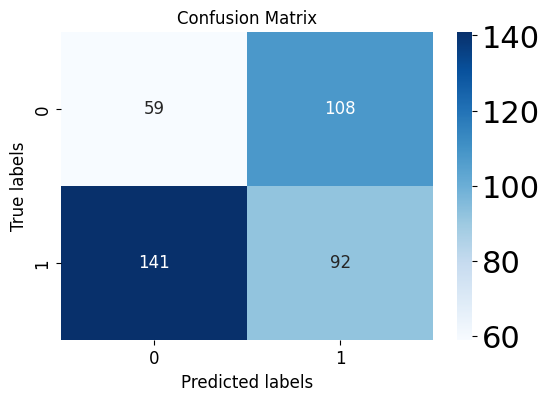

Accuracy: 0.3775
Precision: 0.3948
Recall: 0.4600
F1-Score: 0.4249


In [274]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_data_old,train_labels_old)
y_pred1 = log.predict(test_data_old)

cm = confusion_matrix(y_pred1, test_labels_old)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
  
accuracy =  accuracy_score(test_labels_old, y_pred1)
precision = precision_score(test_labels_old, y_pred1)
recall = recall_score(test_labels_old, y_pred1)
f1 = f1_score(test_labels_old, y_pred1)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")



### Cross Validation Accuracy 

In [322]:

scores = cross_val_score(knn, train_data_old, train_labels_old, cv=7)

mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)


Mean Cross-Validation Score: 0.7067669172932332


### After Appliying PCA for KNN 

torch.Size([1197, 1]) torch.Size([400, 1])


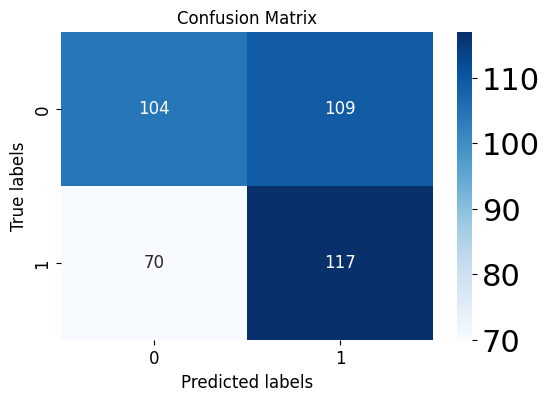

Principal components =================================>   1
Accuracy: 0.5525
Precision: 0.6257
Recall: 0.5177
F1-Score: 0.5666
train Acc :  0.6449456975772765 Test Acc  0.5525 comptime  0.0
*****************************************************************************************
torch.Size([1197, 2]) torch.Size([400, 2])


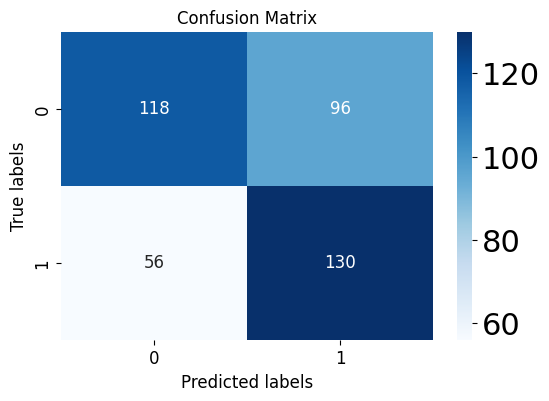

Principal components =================================>   2
Accuracy: 0.6200
Precision: 0.6989
Recall: 0.5752
F1-Score: 0.6311
train Acc :  0.7126148705096074 Test Acc  0.62 comptime  0.0
*****************************************************************************************
torch.Size([1197, 3]) torch.Size([400, 3])


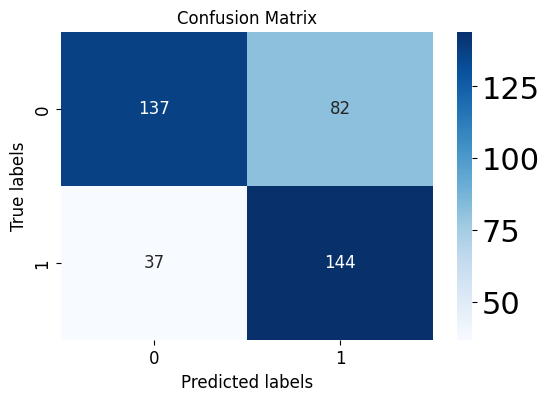

Principal components =================================>   3
Accuracy: 0.7025
Precision: 0.7956
Recall: 0.6372
F1-Score: 0.7076
train Acc :  0.7577276524644946 Test Acc  0.7025 comptime  0.0
*****************************************************************************************
torch.Size([1197, 4]) torch.Size([400, 4])


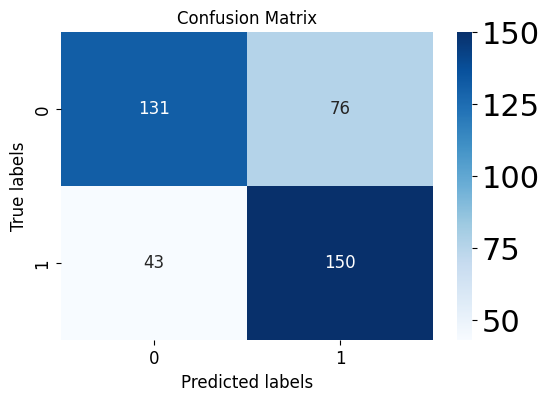

Principal components =================================>   4
Accuracy: 0.7025
Precision: 0.7772
Recall: 0.6637
F1-Score: 0.7160
train Acc :  0.7510442773600668 Test Acc  0.7025 comptime  0.0
*****************************************************************************************
torch.Size([1197, 5]) torch.Size([400, 5])


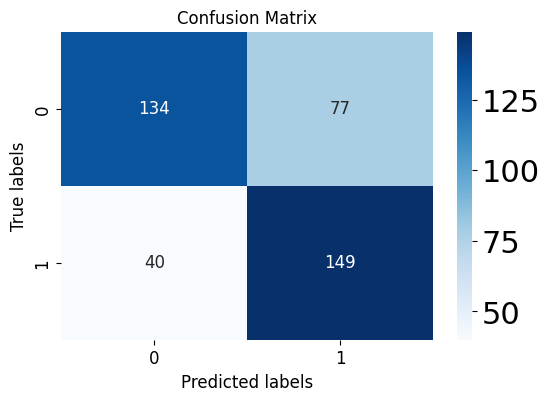

Principal components =================================>   5
Accuracy: 0.7075
Precision: 0.7884
Recall: 0.6593
F1-Score: 0.7181
train Acc :  0.7485380116959064 Test Acc  0.7075 comptime  0.0
*****************************************************************************************
torch.Size([1197, 6]) torch.Size([400, 6])


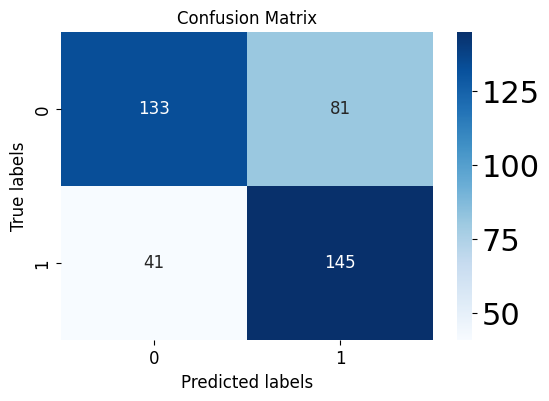

Principal components =================================>   6
Accuracy: 0.6950
Precision: 0.7796
Recall: 0.6416
F1-Score: 0.7039
train Acc :  0.747702589807853 Test Acc  0.695 comptime  0.0
*****************************************************************************************
torch.Size([1197, 7]) torch.Size([400, 7])


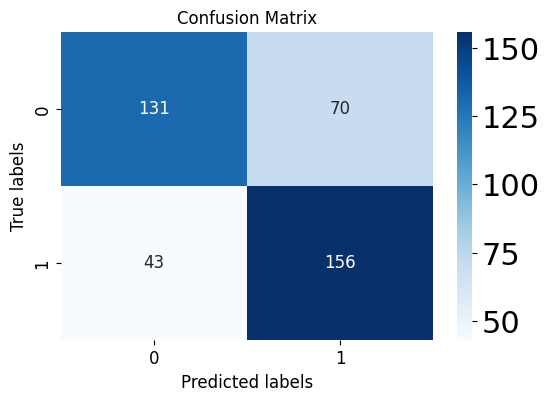

Principal components =================================>   7
Accuracy: 0.7175
Precision: 0.7839
Recall: 0.6903
F1-Score: 0.7341
train Acc :  0.7552213868003341 Test Acc  0.7175 comptime  0.0
*****************************************************************************************
torch.Size([1197, 8]) torch.Size([400, 8])


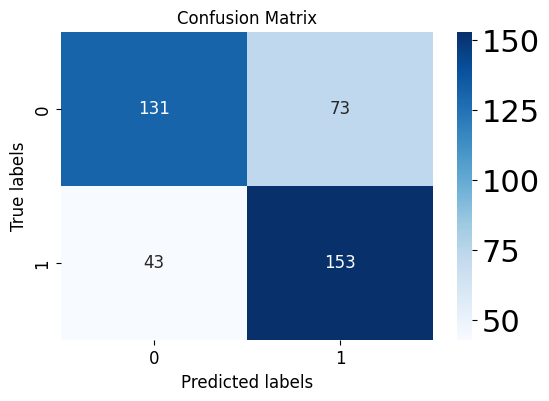

Principal components =================================>   8
Accuracy: 0.7100
Precision: 0.7806
Recall: 0.6770
F1-Score: 0.7251
train Acc :  0.7602339181286549 Test Acc  0.71 comptime  0.03125
*****************************************************************************************
torch.Size([1197, 9]) torch.Size([400, 9])


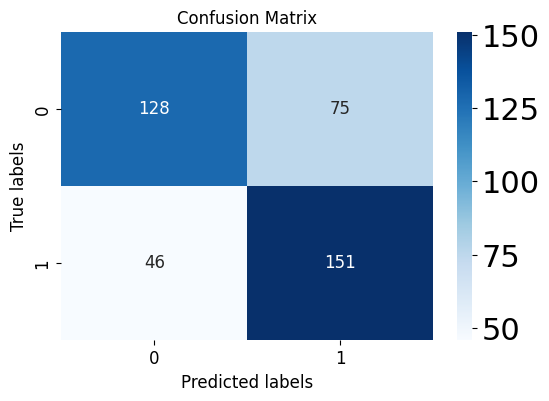

Principal components =================================>   9
Accuracy: 0.6975
Precision: 0.7665
Recall: 0.6681
F1-Score: 0.7139
train Acc :  0.7685881370091896 Test Acc  0.6975 comptime  0.0
*****************************************************************************************
torch.Size([1197, 10]) torch.Size([400, 10])


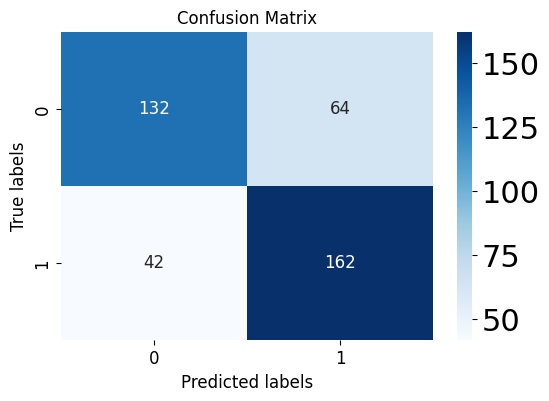

Principal components =================================>   10
Accuracy: 0.7350
Precision: 0.7941
Recall: 0.7168
F1-Score: 0.7535
train Acc :  0.77109440267335 Test Acc  0.735 comptime  0.015625
*****************************************************************************************
torch.Size([1197, 11]) torch.Size([400, 11])


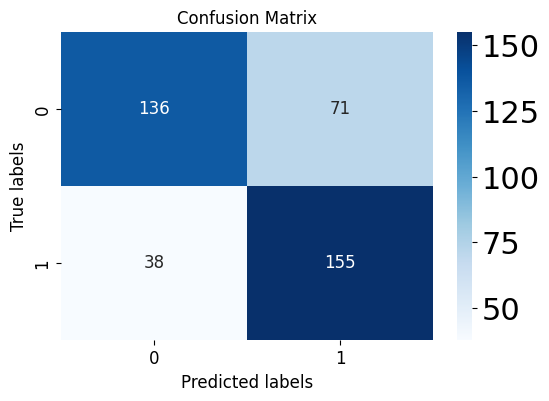

Principal components =================================>   11
Accuracy: 0.7275
Precision: 0.8031
Recall: 0.6858
F1-Score: 0.7399
train Acc :  0.7744360902255639 Test Acc  0.7275 comptime  0.0
*****************************************************************************************


In [326]:
accuracyResultsTrainKNN = np.zeros(12)
accuracyResultsTestKNN = np.zeros(12)
accuracyResultsCrossValidationKNN = np.zeros(12)
resultLosses = np.zeros(12)
comptimeKNN = np.zeros(12)

for component in range(1,12):
    train_data_new_temp = train_data_new[:, 0:component]
    test_data_new_temp = test_data_new[:, 0:component]
    print(train_data_new_temp.shape, test_data_new_temp.shape)
    
    starttime = time.process_time()
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(train_data_new_temp, train_labels_new)
    compltime = time.process_time()
    
    y_train_prediction = knn.predict(train_data_new_temp)
    y_test_prediction = knn.predict(test_data_new_temp)
    
    cm = confusion_matrix(y_test_prediction, test_labels_new)

    # Display the confusion matrix using a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
    plt.xlabel('Predicted labels', fontsize=12)
    plt.ylabel('True labels', fontsize=12)
    plt.title('Confusion Matrix', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
    scores = cross_val_score(knn, train_data_new_temp, train_labels_new, cv=7)
    mean_score = scores.mean()
    
    train_accuracy =  accuracy_score(train_labels_new, y_train_prediction)
    test_accuracy =  accuracy_score(test_labels_new, y_test_prediction)
    precision = precision_score(test_labels_new, y_test_prediction)
    recall = recall_score(test_labels_new, y_test_prediction)
    f1 = f1_score(test_labels_new, y_test_prediction)

    # Print the metrics
    print("Principal components =================================>  ", component)
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    accuracyResultsTrainKNN[component] = train_accuracy
    accuracyResultsTestKNN[component] = test_accuracy
    accuracyResultsCrossValidationKNN[component] = mean_score
    comptimeKNN[component] = (compltime - starttime)
    print("train Acc : ", train_accuracy, "Test Acc ", test_accuracy, "comptime ", comptime[component])
    
    print("*****************************************************************************************")




[0.55472013 0.65831245 0.74269006 0.75856307 0.76858814 0.77025898
 0.76691729 0.78195489 0.78529657 0.7978279  0.79699248]


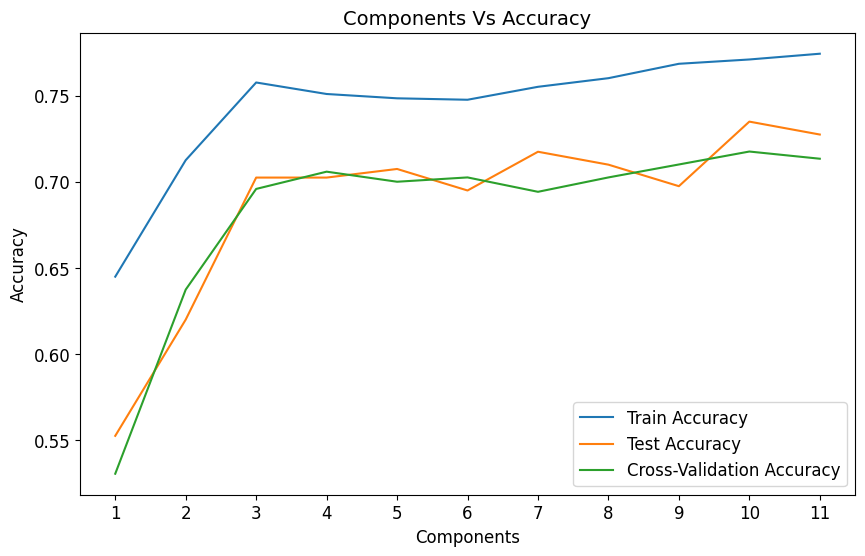

In [327]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
x_labels = ["1","2","3","4","5","6","7","8","9","10","11"]
accuracyResultsTrain_newKNN = accuracyResultsTrainKNN[1:12]
accuracyResultsTest_newKNN = accuracyResultsTestKNN[1:12]
accuracyResultsCrossValidation_newKNN = accuracyResultsCrossValidationKNN[1:12]
print(accuracyResultsTrain_new)

plt.plot(x_labels, accuracyResultsTrain_newKNN, label='Train Accuracy')
plt.plot(x_labels, accuracyResultsTest_newKNN, label='Test Accuracy')
plt.plot(x_labels, accuracyResultsCrossValidation_newKNN, label='Cross-Validation Accuracy')


plt.xlabel('Components',  fontsize=12)
plt.ylabel('Accuracy',  fontsize=12)
plt.title('Components Vs Accuracy',  fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

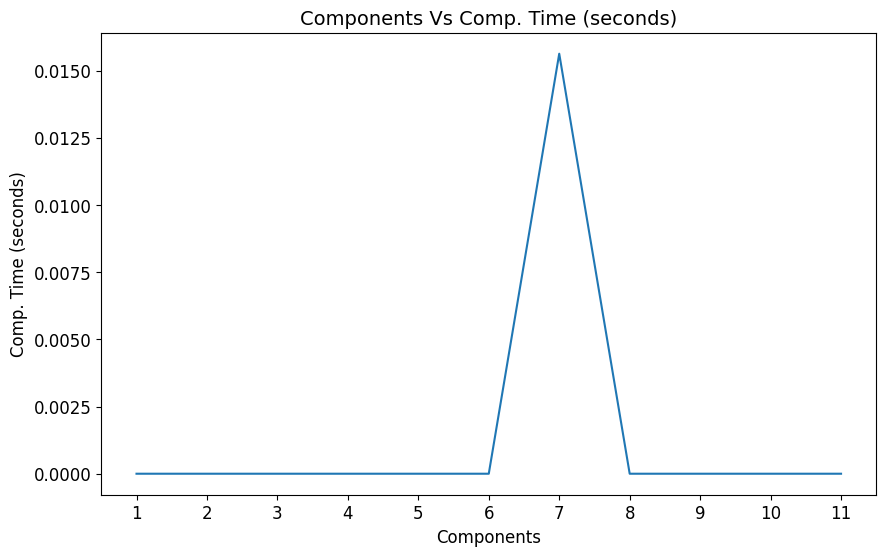

In [328]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
x_labels = ["1","2","3","4","5","6","7","8","9","10","11"]
comptime_new = comptimeKNN[1:12]
plt.plot(x_labels, comptime_new)

plt.xlabel('Components',  fontsize=12)
plt.ylabel('Comp. Time (seconds)',  fontsize=12)
plt.title('Components Vs Comp. Time (seconds)',  fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Artificial Neural Network(ANN) Model

In [185]:
# Create a class for the model
class ANNwine(nn.Module):
  def __init__(self, input_features):
    super().__init__()

    ### Input layer
    self.input = nn.Linear(input_features, 16)
    ### Hidden layers
    self.fc1 = nn.Linear(16, 32)
    self.fc2 = nn.Linear(32, 32)
    ### Output layer
    self.output = nn.Linear(32, 1)
  
  # Forward pass
  def forward(self, x):
    x = F.relu(self.input(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return self.output(x)


In [186]:
# A function that trains the model

numepochs = 2000 

def trainTheModel():

  lossfun = nn.BCEWithLogitsLoss() 
  optimizer = torch.optim.SGD(winenet.parameters(), lr=.01)

  # Initialize lists to store training statistics
  losses = torch.zeros(numepochs)
  trainAcc = []  
  testAcc = [] 
  
  for epochi in range(numepochs):

    winenet.train()

    batchAcc = []    # To store batch accuracies
    batchLoss = []   # To store batch losses

    for X_train, y_train in train_loader:
      # Forward pass and compute loss
      yHat = winenet(X_train)  
      loss = lossfun(yHat, y_train)
      
      # Backpropagation
      optimizer.zero_grad()  
      loss.backward()        
      optimizer.step()

      batchLoss.append(loss.item())
      batchAcc.append(100 * torch.mean(((yHat > 0) == y_train).float()).item())

    # Train accuracy
    trainAcc.append(np.mean(batchAcc))
    losses[epochi] = np.mean(batchLoss)

  # Test accuracy
  winenet.eval() 
  X_test, y_test = next(iter(test_loader)) 
  with torch.no_grad():  
    yHat = winenet(X_test) 
  testing_accuracy = 100 * torch.mean(((yHat > 0) == y_test).float()).item()
  testAcc.append(testing_accuracy)
  print("Testing Accuracy : ", testing_accuracy)

  binary_result = (yHat > 0).float()
  cm = confusion_matrix(binary_result, y_test)

  # Display the confusion matrix using a heatmap
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
  plt.xlabel('Predicted labels', fontsize=12)
  plt.ylabel('True labels', fontsize=12)
  plt.title('Confusion Matrix', fontsize=12)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.show()
  
  accuracy = accuracy_score(y_test, binary_result)

  # Calculate precision, recall, and F1-score
  precision = precision_score(y_test, binary_result)
  recall = recall_score(y_test, binary_result)
  f1 = f1_score(y_test, binary_result)

  # Print the metrics
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")

  # Generate a classification report (includes precision, recall, F1-score, support)
  print("\nClassification Report:")
  print(classification_report(y_test, binary_result))
  
  return trainAcc, testAcc, losses


Testing Accuracy :  74.00000095367432


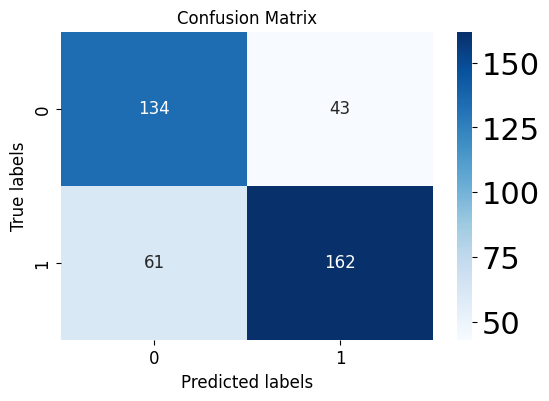

Accuracy: 0.7400
Precision: 0.7265
Recall: 0.7902
F1-Score: 0.7570

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72       195
         1.0       0.73      0.79      0.76       205

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



In [187]:
train_dataDataset = TensorDataset(train_data_old ,train_labels_old)
test_dataDataset  = TensorDataset(test_data_old ,test_labels_old)

comptime = 0
test_loader = DataLoader(test_dataDataset, batch_size=test_dataDataset.tensors[0].shape[0])

starttime = time.process_time()
train_loader = DataLoader(train_dataDataset,batch_size=32, shuffle=True, drop_last=True)
first_data_tensor = train_dataDataset[0][0]
num_columns = first_data_tensor.size(0)
winenet = ANNwine(num_columns)
trainAcc, testAcc, losses = trainTheModel()
comptime = time.process_time() - starttime


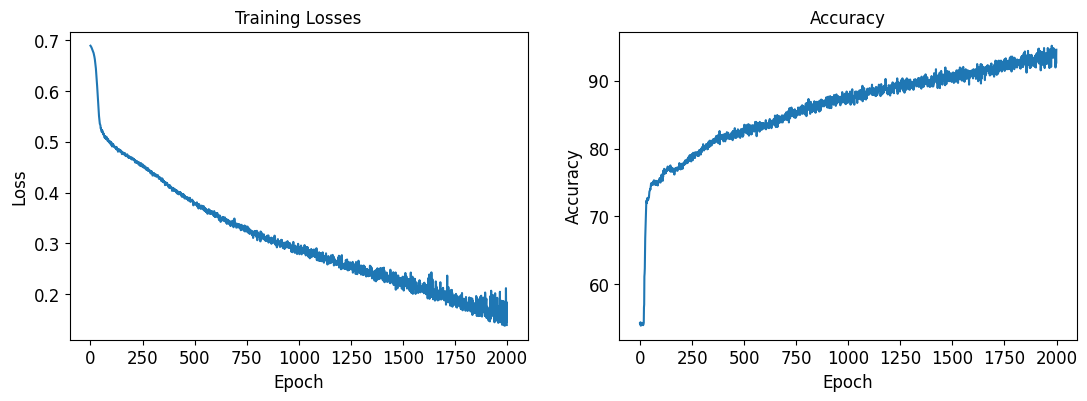

In [188]:
import matplotlib.pyplot as plt

# Create subplots for losses and accuracy.
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

# Plot training losses.
ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss', fontsize=12)
ax[0].set_xlabel('Epoch', fontsize=12)
ax[0].set_title('Training Losses', fontsize=12)
ax[0].tick_params(axis='both', which='major', labelsize=12)

ax[1].plot(trainAcc)
ax[1].set_ylabel('Accuracy', fontsize=12)
ax[1].set_xlabel('Epoch', fontsize=12)
ax[1].set_title('Accuracy', fontsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)

plt.show()


In [189]:
np.mean(trainAcc), testAcc, comptime

(86.04632601351352, [74.00000095367432], 69.734375)

torch.Size([1197, 1]) torch.Size([400, 1])
Testing Accuracy :  52.99999713897705


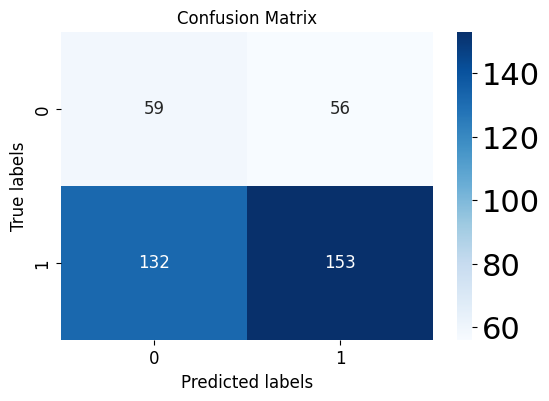

Accuracy: 0.5300
Precision: 0.5368
Recall: 0.7321
F1-Score: 0.6194

Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.31      0.39       191
         1.0       0.54      0.73      0.62       209

    accuracy                           0.53       400
   macro avg       0.52      0.52      0.50       400
weighted avg       0.53      0.53      0.51       400

train Acc :  56.42639358108108 Test Acc  [52.99999713897705] comptime  74.15625
torch.Size([1197, 2]) torch.Size([400, 2])
Testing Accuracy :  64.49999809265137


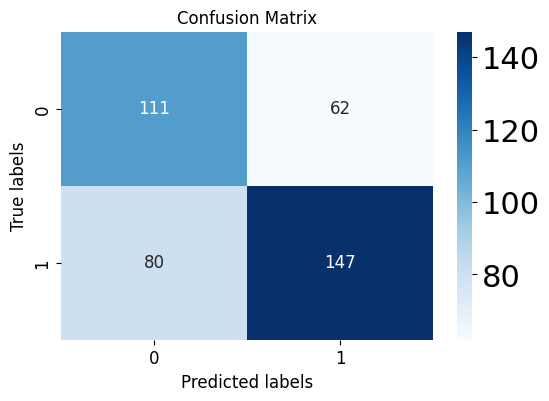

Accuracy: 0.6450
Precision: 0.6476
Recall: 0.7033
F1-Score: 0.6743

Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.58      0.61       191
         1.0       0.65      0.70      0.67       209

    accuracy                           0.65       400
   macro avg       0.64      0.64      0.64       400
weighted avg       0.64      0.65      0.64       400

train Acc :  66.49890202702703 Test Acc  [64.49999809265137] comptime  71.625
torch.Size([1197, 3]) torch.Size([400, 3])
Testing Accuracy :  71.74999713897705


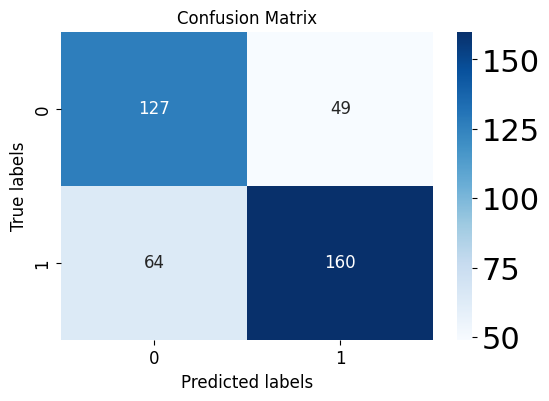

Accuracy: 0.7175
Precision: 0.7143
Recall: 0.7656
F1-Score: 0.7390

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.66      0.69       191
         1.0       0.71      0.77      0.74       209

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400

train Acc :  75.10202702702702 Test Acc  [71.74999713897705] comptime  73.609375
torch.Size([1197, 4]) torch.Size([400, 4])
Testing Accuracy :  69.24999952316284


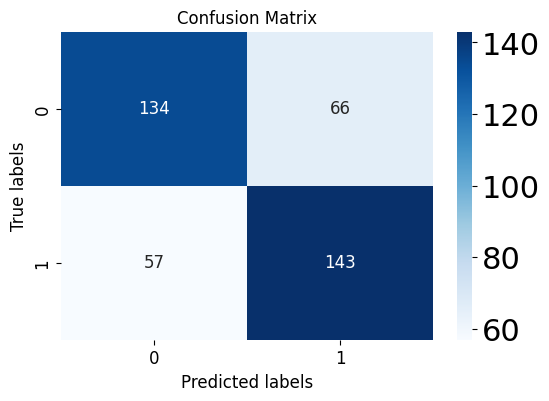

Accuracy: 0.6925
Precision: 0.7150
Recall: 0.6842
F1-Score: 0.6993

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.70      0.69       191
         1.0       0.71      0.68      0.70       209

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.69      0.69      0.69       400

train Acc :  78.11587837837837 Test Acc  [69.24999952316284] comptime  74.625
torch.Size([1197, 5]) torch.Size([400, 5])
Testing Accuracy :  74.25000071525574


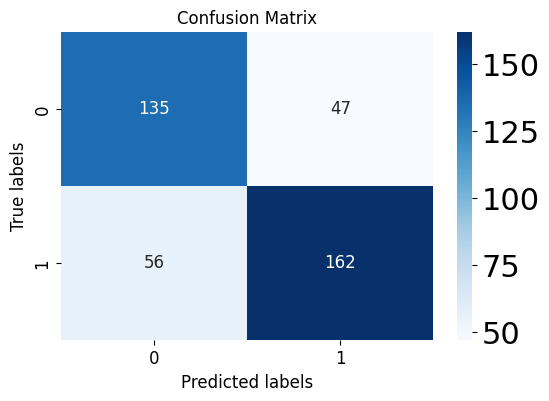

Accuracy: 0.7425
Precision: 0.7431
Recall: 0.7751
F1-Score: 0.7588

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72       191
         1.0       0.74      0.78      0.76       209

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400

train Acc :  79.4377956081081 Test Acc  [74.25000071525574] comptime  75.078125
torch.Size([1197, 6]) torch.Size([400, 6])
Testing Accuracy :  72.75000214576721


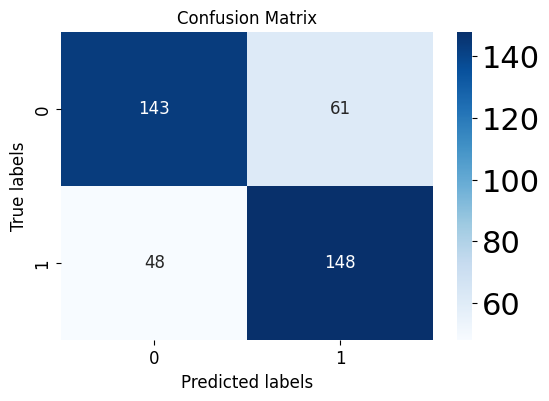

Accuracy: 0.7275
Precision: 0.7551
Recall: 0.7081
F1-Score: 0.7309

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.75      0.72       191
         1.0       0.76      0.71      0.73       209

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400

train Acc :  80.42516891891891 Test Acc  [72.75000214576721] comptime  70.953125
torch.Size([1197, 7]) torch.Size([400, 7])
Testing Accuracy :  73.7500011920929


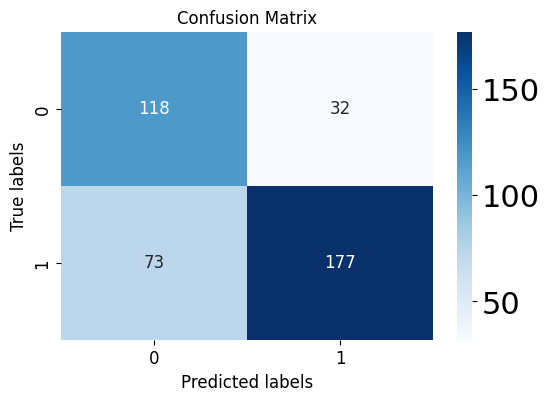

Accuracy: 0.7375
Precision: 0.7080
Recall: 0.8469
F1-Score: 0.7712

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.62      0.69       191
         1.0       0.71      0.85      0.77       209

    accuracy                           0.74       400
   macro avg       0.75      0.73      0.73       400
weighted avg       0.75      0.74      0.73       400

train Acc :  83.1685810810811 Test Acc  [73.7500011920929] comptime  72.53125
torch.Size([1197, 8]) torch.Size([400, 8])
Testing Accuracy :  70.24999856948853


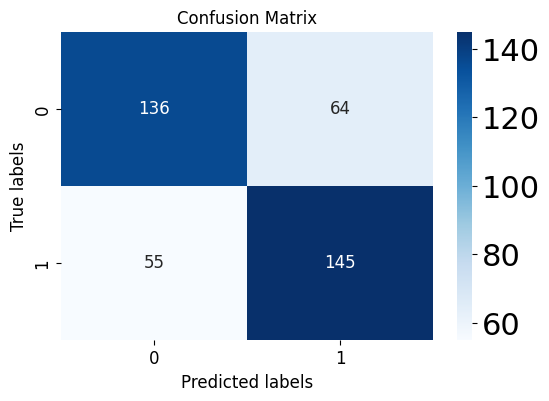

Accuracy: 0.7025
Precision: 0.7250
Recall: 0.6938
F1-Score: 0.7090

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.71      0.70       191
         1.0       0.72      0.69      0.71       209

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.70      0.70      0.70       400

train Acc :  83.86549831081079 Test Acc  [70.24999856948853] comptime  70.671875
torch.Size([1197, 9]) torch.Size([400, 9])
Testing Accuracy :  72.50000238418579


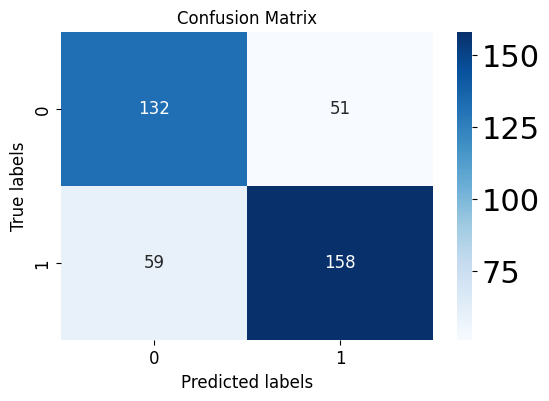

Accuracy: 0.7250
Precision: 0.7281
Recall: 0.7560
F1-Score: 0.7418

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.69      0.71       191
         1.0       0.73      0.76      0.74       209

    accuracy                           0.73       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400

train Acc :  84.91600506756757 Test Acc  [72.50000238418579] comptime  71.125
torch.Size([1197, 10]) torch.Size([400, 10])
Testing Accuracy :  72.75000214576721


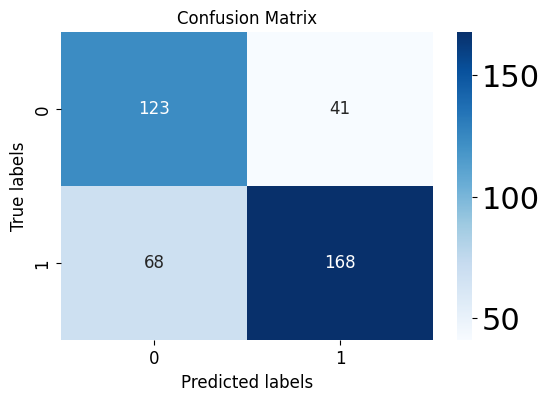

Accuracy: 0.7275
Precision: 0.7119
Recall: 0.8038
F1-Score: 0.7551

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.64      0.69       191
         1.0       0.71      0.80      0.76       209

    accuracy                           0.73       400
   macro avg       0.73      0.72      0.72       400
weighted avg       0.73      0.73      0.73       400

train Acc :  86.35485641891891 Test Acc  [72.75000214576721] comptime  72.609375
torch.Size([1197, 11]) torch.Size([400, 11])
Testing Accuracy :  73.7500011920929


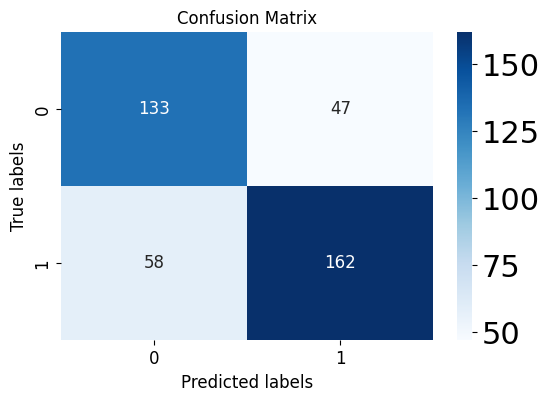

Accuracy: 0.7375
Precision: 0.7364
Recall: 0.7751
F1-Score: 0.7552

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72       191
         1.0       0.74      0.78      0.76       209

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400

train Acc :  87.62069256756757 Test Acc  [73.7500011920929] comptime  72.171875


In [190]:
accuracyResultsTrain = np.zeros(12)
accuracyResultsTest = np.zeros(12)
resultLosses = np.zeros(12)
comptime = np.zeros(12)

for component in range(1,12):
    train_data_new_temp = train_data_new[:, 0:component]
    test_data_new_temp = test_data_new[:, 0:component]
    print(train_data_new_temp.shape, test_data_new_temp.shape)
  
    train_dataDataset_new = TensorDataset(train_data_new_temp ,train_labels_new)
    test_dataDataset_new  = TensorDataset(test_data_new_temp ,test_labels_new)
    test_loader = DataLoader(test_dataDataset_new, batch_size=test_dataDataset_new.tensors[0].shape[0])
  
    starttime = time.process_time()
    train_loader = DataLoader(train_dataDataset_new,batch_size=32, shuffle=True, drop_last=True)
    first_data_tensor = train_dataDataset_new[0][0]
    num_columns = first_data_tensor.size(0)
    winenet = ANNwine(num_columns)
    trainAcc_new, testAcc_new, losses_new = trainTheModel()
  
    accuracyResultsTrain[component] = np.mean(trainAcc_new)
    accuracyResultsTest[component] = testAcc_new[0]
    comptime[component] = time.process_time() - starttime
    print("train Acc : ", np.mean(trainAcc_new), "Test Acc ", testAcc_new, "comptime ", time.process_time() - starttime)


[56.42639358 66.49890203 75.10202703 78.11587838 79.43779561 80.42516892
 83.16858108 83.86549831 84.91600507 86.35485642 87.62069257]


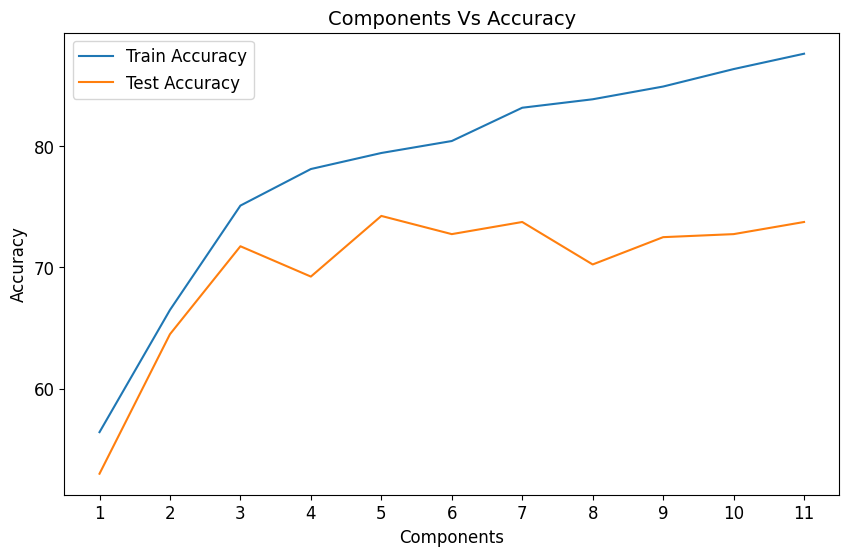

In [213]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
x_labels = ["1","2","3","4","5","6","7","8","9","10","11"]
accuracyResultsTrain_new = accuracyResultsTrain[1:12]
accuracyResultsTest_new = accuracyResultsTest[1:12]

print(accuracyResultsTrain_new)

plt.plot(x_labels, accuracyResultsTrain_new, label='Train Accuracy')
plt.plot(x_labels, accuracyResultsTest_new, label='Test Accuracy')

plt.xlabel('Components',  fontsize=12)
plt.ylabel('Accuracy',  fontsize=12)
plt.title('Components Vs Accuracy',  fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

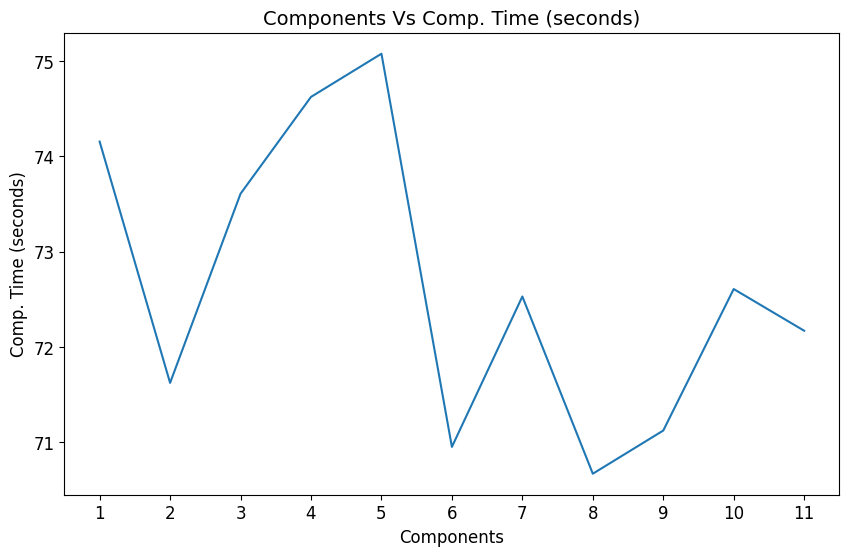

In [216]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
x_labels = ["1","2","3","4","5","6","7","8","9","10","11"]
comptime_new = comptime[1:12]
plt.plot(x_labels, comptime_new)

plt.xlabel('Components',  fontsize=12)
plt.ylabel('Comp. Time (seconds)',  fontsize=12)
plt.title('Components Vs Comp. Time (seconds)',  fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()